# Kaggle Survey 2021


## 가제: 당신을 만족시킬 ML/DS 취준생 가이드
- Data 직군의 취업을 희망하는 취준생이라면 궁금해할 질문(글로벌 기준)
- kaggle survey 2021 자료를 통해 질문 답변식으로 구성함으로써 필요한 정보 제공
- 또한 직군을 DA, DE, DS로 나누고 학생, 구직자, other은 Other로 나눠서 현직자와 구직자(?)의 답변을 비교해 볼 수 있음.

- 참고) 기사 스크랩
  - “인공지능 연구자나 개발자가 되려면 어떤 역량을 갖춰야 하나요?”(글로벌 기준): http://www.aitimes.com/news/articleView.html?idxno=141223
  - 4차 산업혁명 시대에 최고의 보수를 받는 인공지능 직업은? : http://www.aitimes.com/news/articleView.html?idxno=140688
  - AI 분야 취직하려면 이 기술 전문가 되라: http://www.aitimes.com/news/articleView.html?idxno=132293



---



---



### 질문 예시


Q. 직군별 성별 비율
Q2	Gender
Q5	JobTitle

Q. 연령에 따른 성별 분포
Q1	Age
Q5	JobTitle

Q. 프로그래밍 공부 최소 어느 정도 해야 취직이 가능할까요?
직군별 프로그래밍 코드 사용기간(최저)
Q5	JobTitle
Q6	YearsToCode

Q. 직군별 평균 나이
Q1	Age
Q5	JobTitle

Q. 직군별 최종학력
Q4	FormalEducation
Q5	JobTitle

Q. 직군별로 어떤 언어를 사용하시나요?
Q5	JobTitle
Q7	Language_regular

Q. 직군별로 어떤 언어를 추천하시나요?
Q5	JobTitle
Q8	Language_first

Q. 직군별로 평소에 사용하는 시각화 라이브러리는 무엇인가요?
Q5	JobTitle
Q14	Vis_library

Q. 직군별로 사용하는 ML 알고리즘은 무엇인가요?
Q5	JobTitle
Q17	ML_algorithm

Q. 직군별로 현재 종사하는 산업의 비율?은 어떠한가요?
Q5	JobTitle
Q20	JobIndustry

Q. 직군별 회사 규모에 따른 연봉은 어떠한가요?
Q5	JobTitle
Q21	CompanySize	회사규모
Q25	Year_Compensation	연봉 ($USD)

Q. 데이터분석 또는 머신러닝 앱을 어디에 배포하나요?
Q5	JobTitle
Q39	PublicToDeploy

Q. 데이터사이언스를 배울때 어떤 플랫폼을 사용했나요?
Q5	JobTitle
Q40	PlatformToLear_DS

Q. 데이터사이언스와 관련된 주제를 다루는 미디어 중 가장 선호하는 채널은 무엇인가요?
Q5	JobTitle
Q42	MediaSourceToLearn

### 데이터 불러오기

In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [2]:
!pip install pywaffle

     |████████████████████████████████| 526 kB 6.5 MB/s 


In [3]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dddddyoung2","key":"db5acc40674f76aef5c7cf9610dbb794"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c kaggle-survey-2021
!unzip kaggle_survey_2021_responses.csv.zip

  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 59.5MB/s]
  0% 0.00/55.2k [00:00<?, ?B/s]
100% 55.2k/55.2k [00:00<00:00, 57.4MB/s]
  0% 0.00/2.86M [00:00<?, ?B/s]
100% 2.86M/2.86M [00:00<00:00, 47.2MB/s]
Archive:  kaggle_survey_2021_responses.csv.zip
  inflating: kaggle_survey_2021_responses.csv  


In [6]:
response = pd.read_csv('kaggle_survey_2021_responses.csv')
response

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool

In [7]:
response.drop(index=0, inplace=True) # 첫째 행 삭제
response.index = range(len(response)) # index 재조정
response = response.fillna('') # NaN → 빈값으로 변경
print(response.shape)
response.head()

(25973, 369)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,,,,,,,,,,,,Python,,,,,,,,,Vim / Emacs,,,,,,Colab Notebooks,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,,,SQL,C,C++,Java,,,,,,,,Python,,,,,,,Notepad++,,,,Jupyter Notebook,,,Kaggle Notebooks,Colab Notebooks,,,,,...,,,Qlik,,,,,,,,,,,,"Automated model selection (e.g. auto-sklearn, ...",,,,,,Google Cloud AutoML,,,,,,,,,,,,,,,,,,None,
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,,,,C++,Java,,,,,,,,Python,,,,,PyCharm,,,,,,Jupyter Notebook,,Other,Kaggle Notebooks,,,,,,...,,,,,,,,,,,,,,,"Automated model selection (e.g. auto-sklearn, ...",,,,,,,,,DataRobot AutoML,,,,,,,,,TensorBoard,,,,,,,
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,,,,,,,,,,,,,Python,,,,,,Spyder,,,,,Jupyter Notebook,,,,Colab Notebooks,,,,,...,,,,,,,,,,,None,,,,,,,,None,,,,,,,,,,,,,,,,,,,,None,
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,,,C,,,,,,,MATLAB,,,Python,,,,,,Spyder,,,,MATLAB,Jupyter Notebook,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [8]:
# 진우님 코드 참고

def total_answer(column):
  # 해당 컬럼명이 들어간 컬럼 추출
  col = response.columns[response.columns.str.contains(column)]
  tmp = response[col]

  # 컬럼별 응답 join
  total = tmp.apply(','.join, axis=1)

  # 정규표현식으로 필요없는 콤마 삭제
  import re
  ls = []
  for i in total:
    ls.append(re.sub(',{2,}', ',', i).strip(','))

  # 나눠진 응답 삭제
  response.drop(col, axis=1, inplace=True)
  # 통합 응답 추가
  response[column] = ls

In [9]:
for i in range(7, 43):
  num = 'Q'+str(i) 
  total_answer(num)

In [11]:
response['Q5'].value_counts()

Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: Q5, dtype: int64

### 직군 나누기 (DA, DS, DE, OTHER)
- 진우님 코드 참고
- DA, DE, DS로 분류 
- Student', 'Currently not employed', 'Other'는 'OTHER'로 분류
  - 학생과 취준생은 Data 직군 취직 희망자로 가정
  - Other은 비전공인데도 Data 역량을 가지고 있거나, 이직 희망자라고 가정할 수 있음

In [12]:
response['Q5'] = response['Q5'].replace(['Business Analyst', 'Data Analyst', 'Product Manager', 'Program/Project Manager', 'Statistician'],'DA')
response['Q5'] = response['Q5'].replace(['Data Engineer', 'DBA/Database Engineer', 'Machine Learning Engineer', 'Software Engineer', 'Developer Relations/Advocacy'], 'DE')
response['Q5'] = response['Q5'].replace(['Data Scientist', 'Research Scientist'], 'DS')
response['Q5'] = response['Q5'].replace(['Student', 'Currently not employed', 'Other'], 'OTHER')

### Kaggle Survey 2021 자료의 job 분포

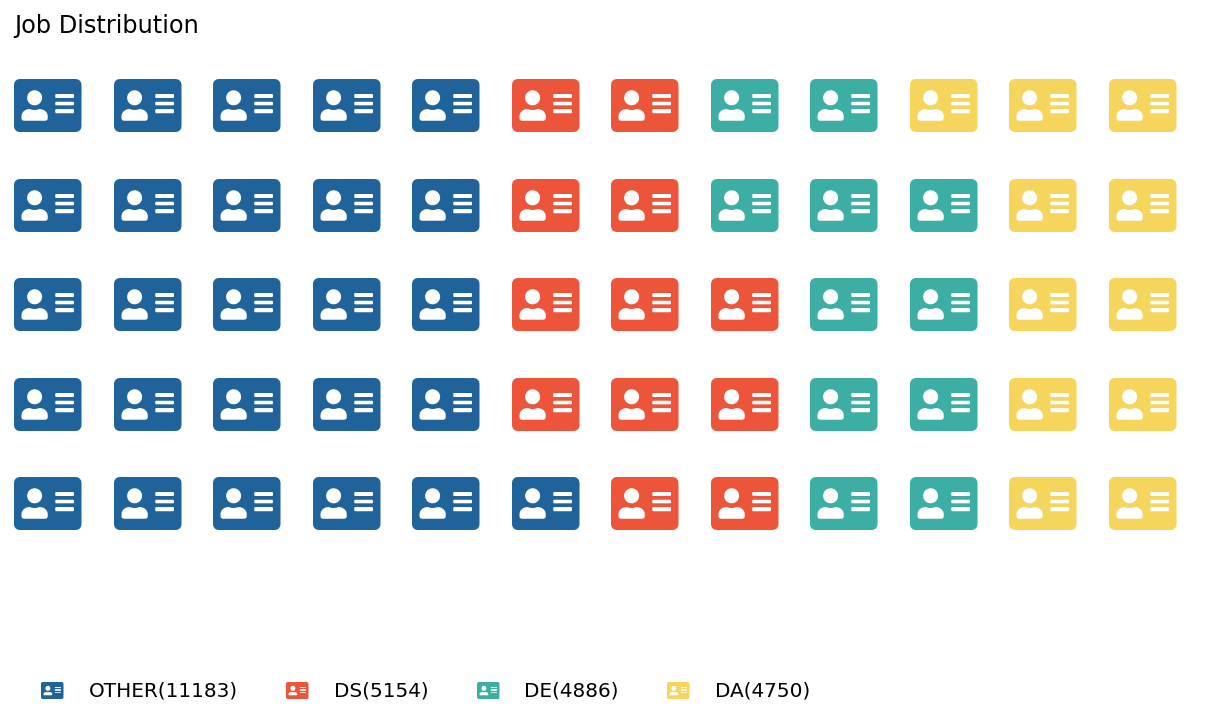

In [13]:
from pywaffle import Waffle
job = response['Q5'].value_counts()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=12,
    values=job,
    colors = ('#20639B', '#ED553B', '#3CAEA3', '#F5D55C'),
    title={'label': 'Job Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(job.index, job) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(response), 'framealpha': 0},
    font_size=30, 
    icons = 'address-card',
    figsize=(12, 5),  
    icon_legend=True
)

### Q. 직군별 성별 비율
Q2	Gender

Q5	JobTitle

https://www.kaggle.com/subinium/the-hitchhiker-s-guide-to-the-kaggle
waffle, 

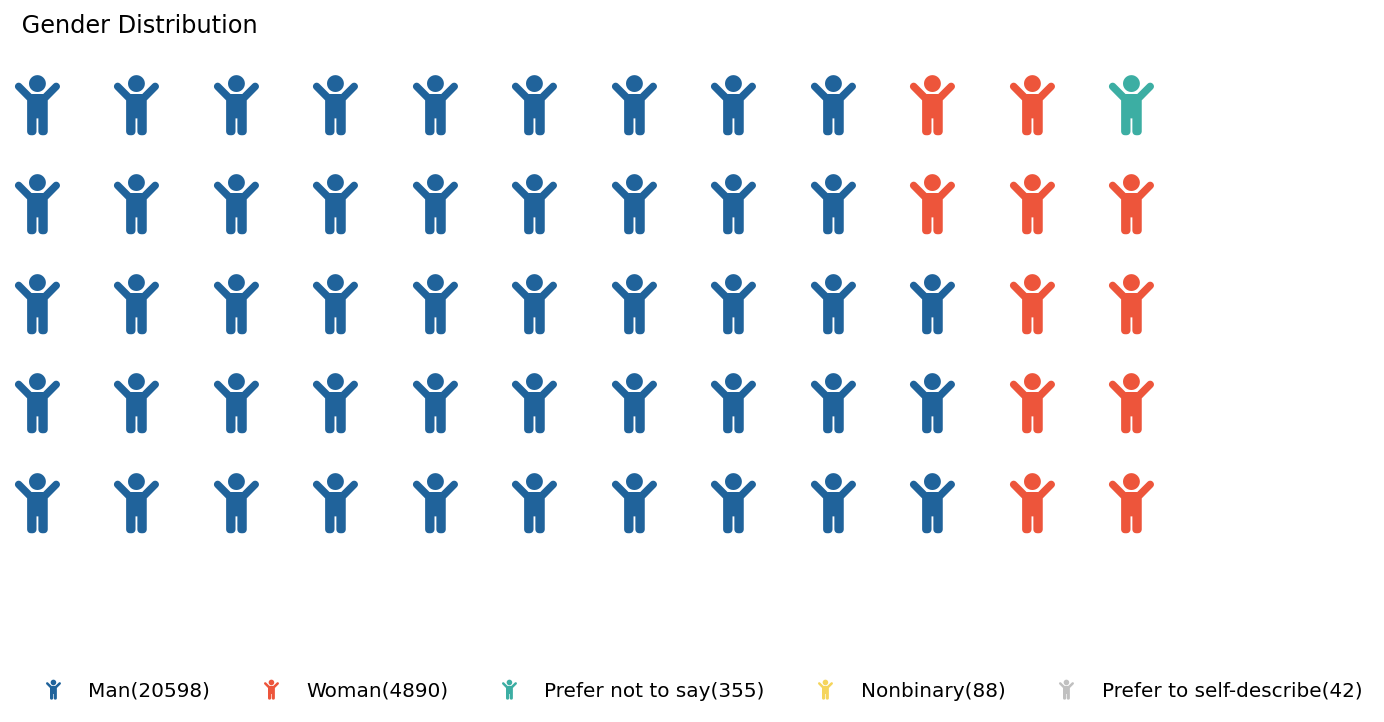

In [14]:
# 전체 성별 분포
gender = response['Q2'].value_counts()

fig = plt.figure(
  FigureClass=Waffle, 
  rows=5,
  columns=12,
  values=gender,
  colors = ('#20639B', '#ED553B', '#3CAEA3', '#F5D55C', '#C0C0C0'),
  title={'label': ' Gender Distribution', 'loc': 'left'},
  labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender) ],
  legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(gender), 'framealpha': 0},
  font_size=30, 
  icons = 'child',
  figsize=(12, 5),  
  icon_legend=True
)

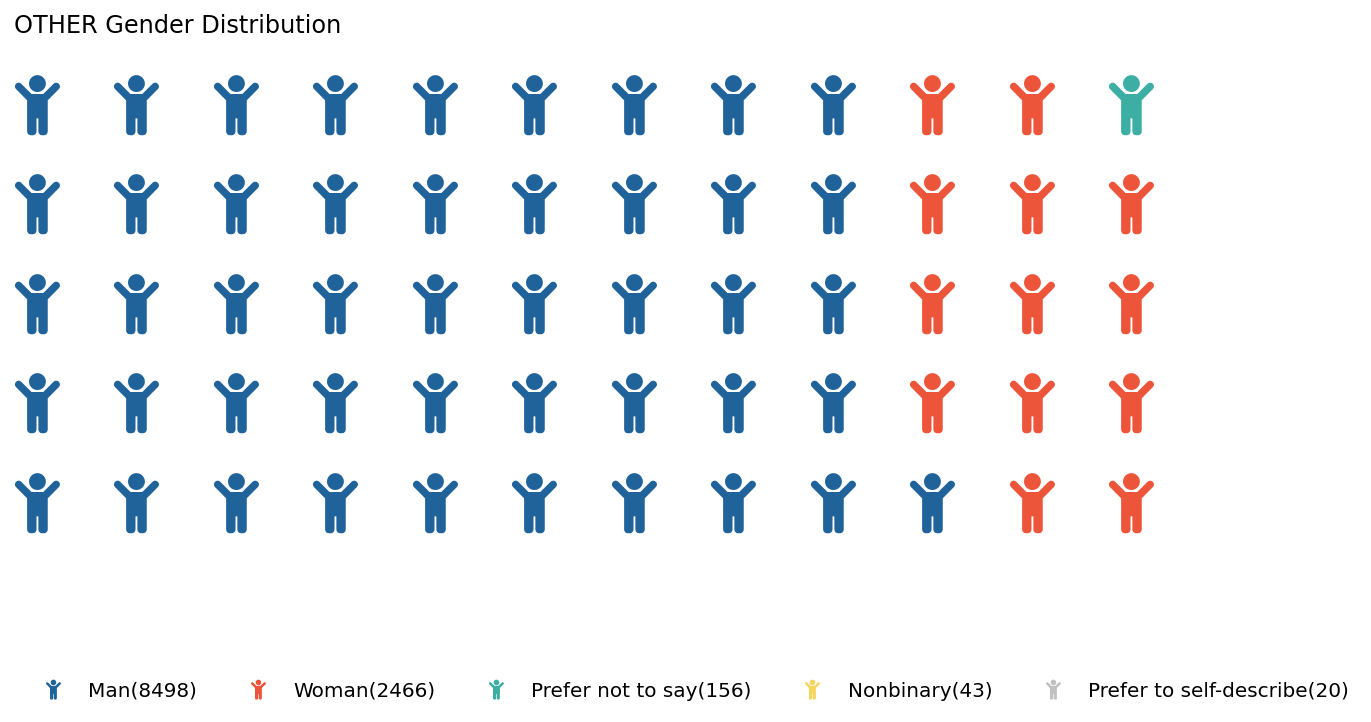

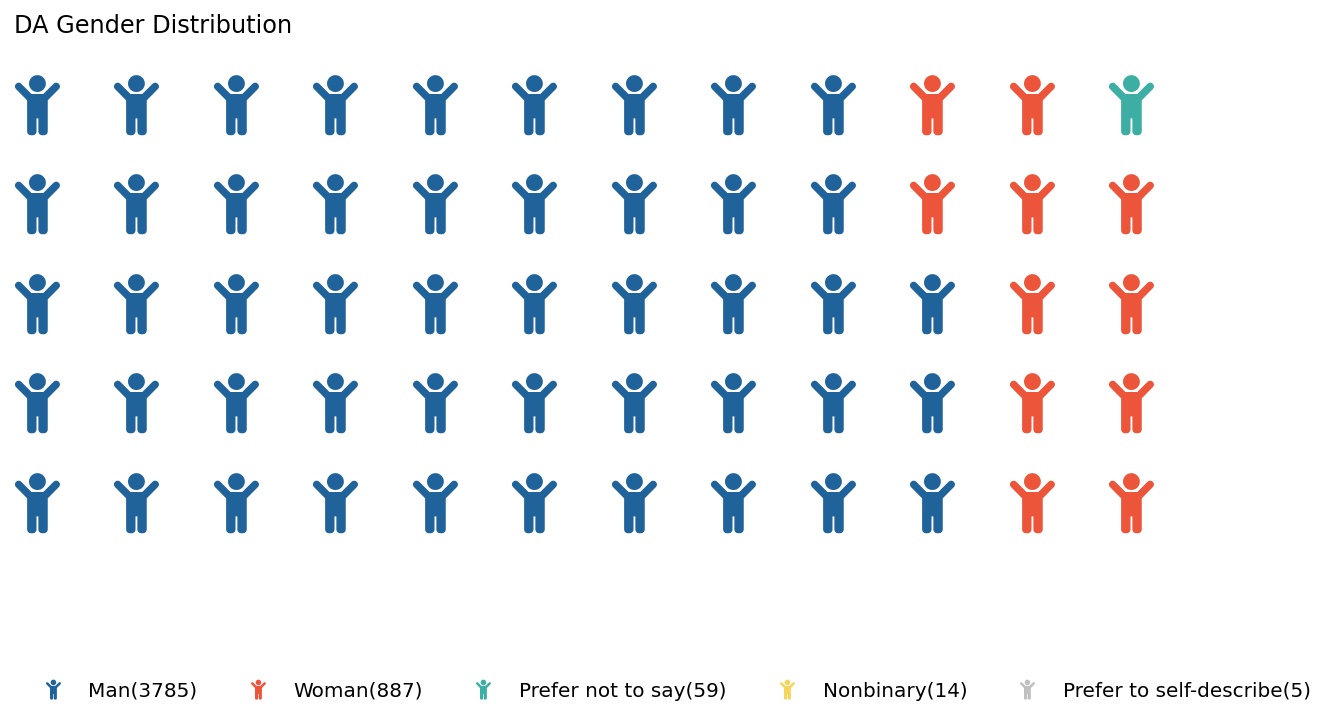

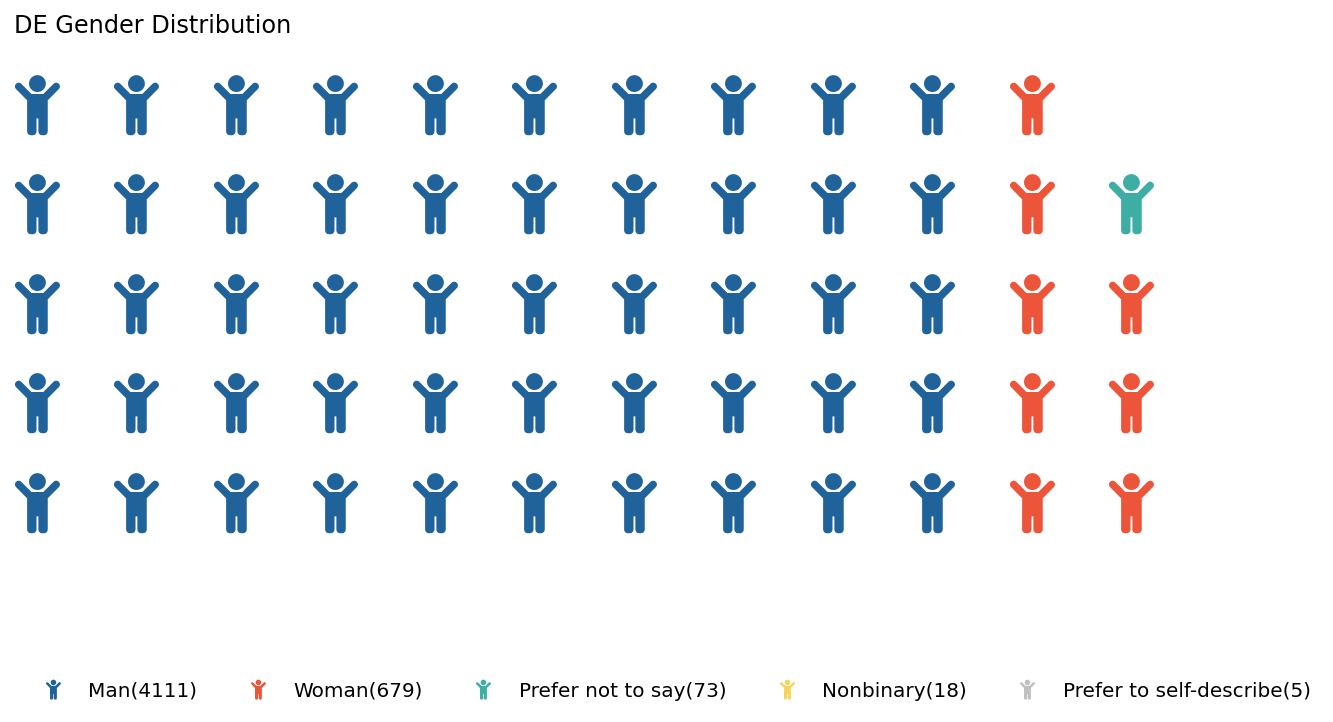

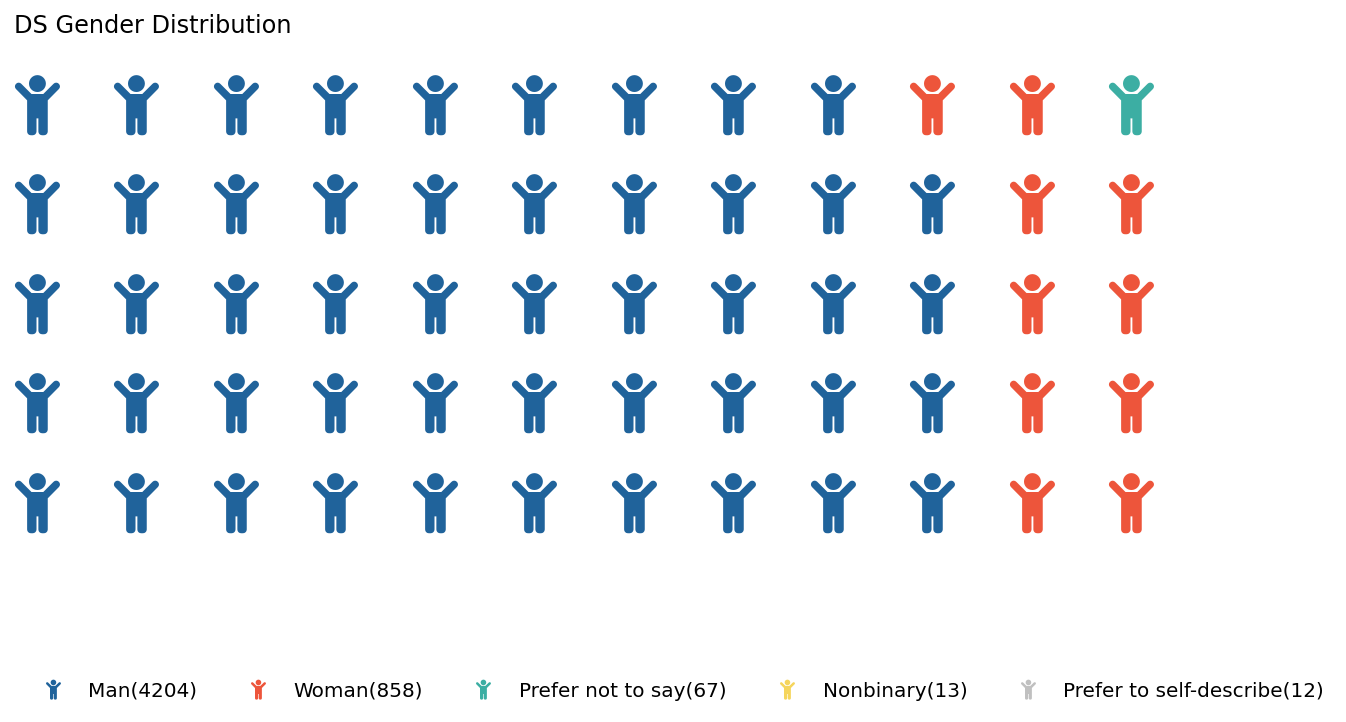

In [15]:
# 직군별 성별 분포
job = response['Q5'].unique()
#gender = response[response['Q5'] == 'DS']['Q2'].value_counts()

for i in job:
  gender = response[response['Q5'] == i]['Q2'].value_counts()
  fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    columns=12,
    values=gender,
    colors = ('#20639B', '#ED553B', '#3CAEA3', '#F5D55C', '#C0C0C0'),
    title={'label': f'{i}'' Gender Distribution', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(gender.index, gender) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(gender), 'framealpha': 0},
    font_size=30, 
    icons = 'child',
    figsize=(12, 5),  
    icon_legend=True
)

### Q 연령에 따른 성별 분포
- 직군별로 나누고 싶은데 실패-> 다시 하기

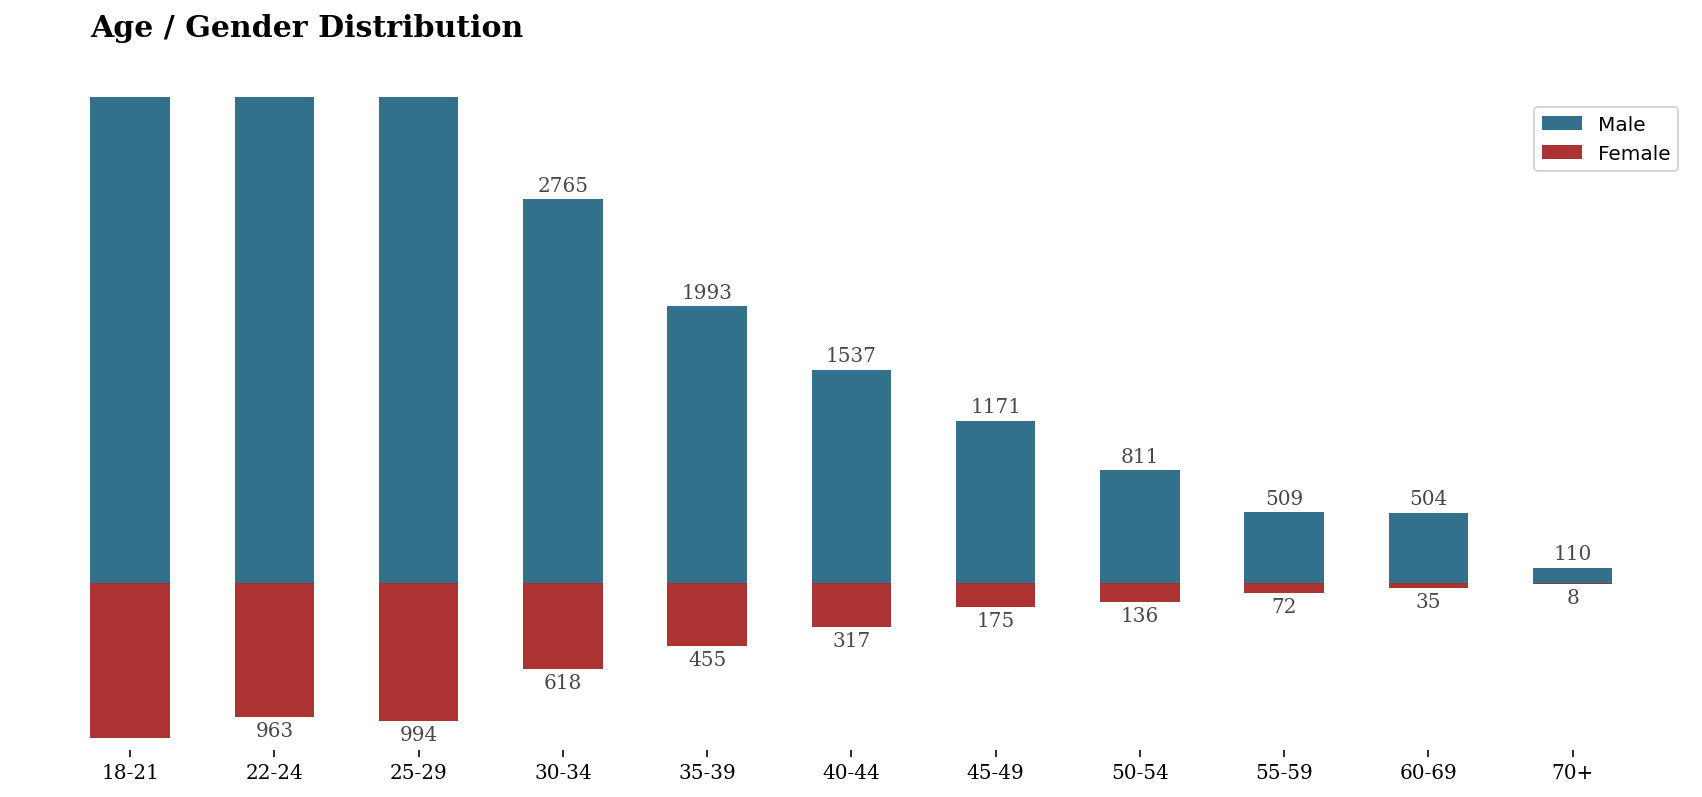

In [17]:

response['Q2'] = response['Q2'].apply(lambda x : 'ETC' if x not in ['Man', 'Woman'] else x)
data_q1q2 = response[response['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-1200, 3500)

for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()



---



---



# 아래는 진우님 시각화 코드 추가했습니다.
- 제목만 바꿔봤습니다.


### Q. 프로그래밍을 최소 몇 년동안 공부해야 취직이 가능할까요?
- Q6 코딩, 프로그래밍 사용 연수
- 직군별 프로그래밍 코드 사용기간(최저)

Q5	JobTitle

Q6	YearsToCode

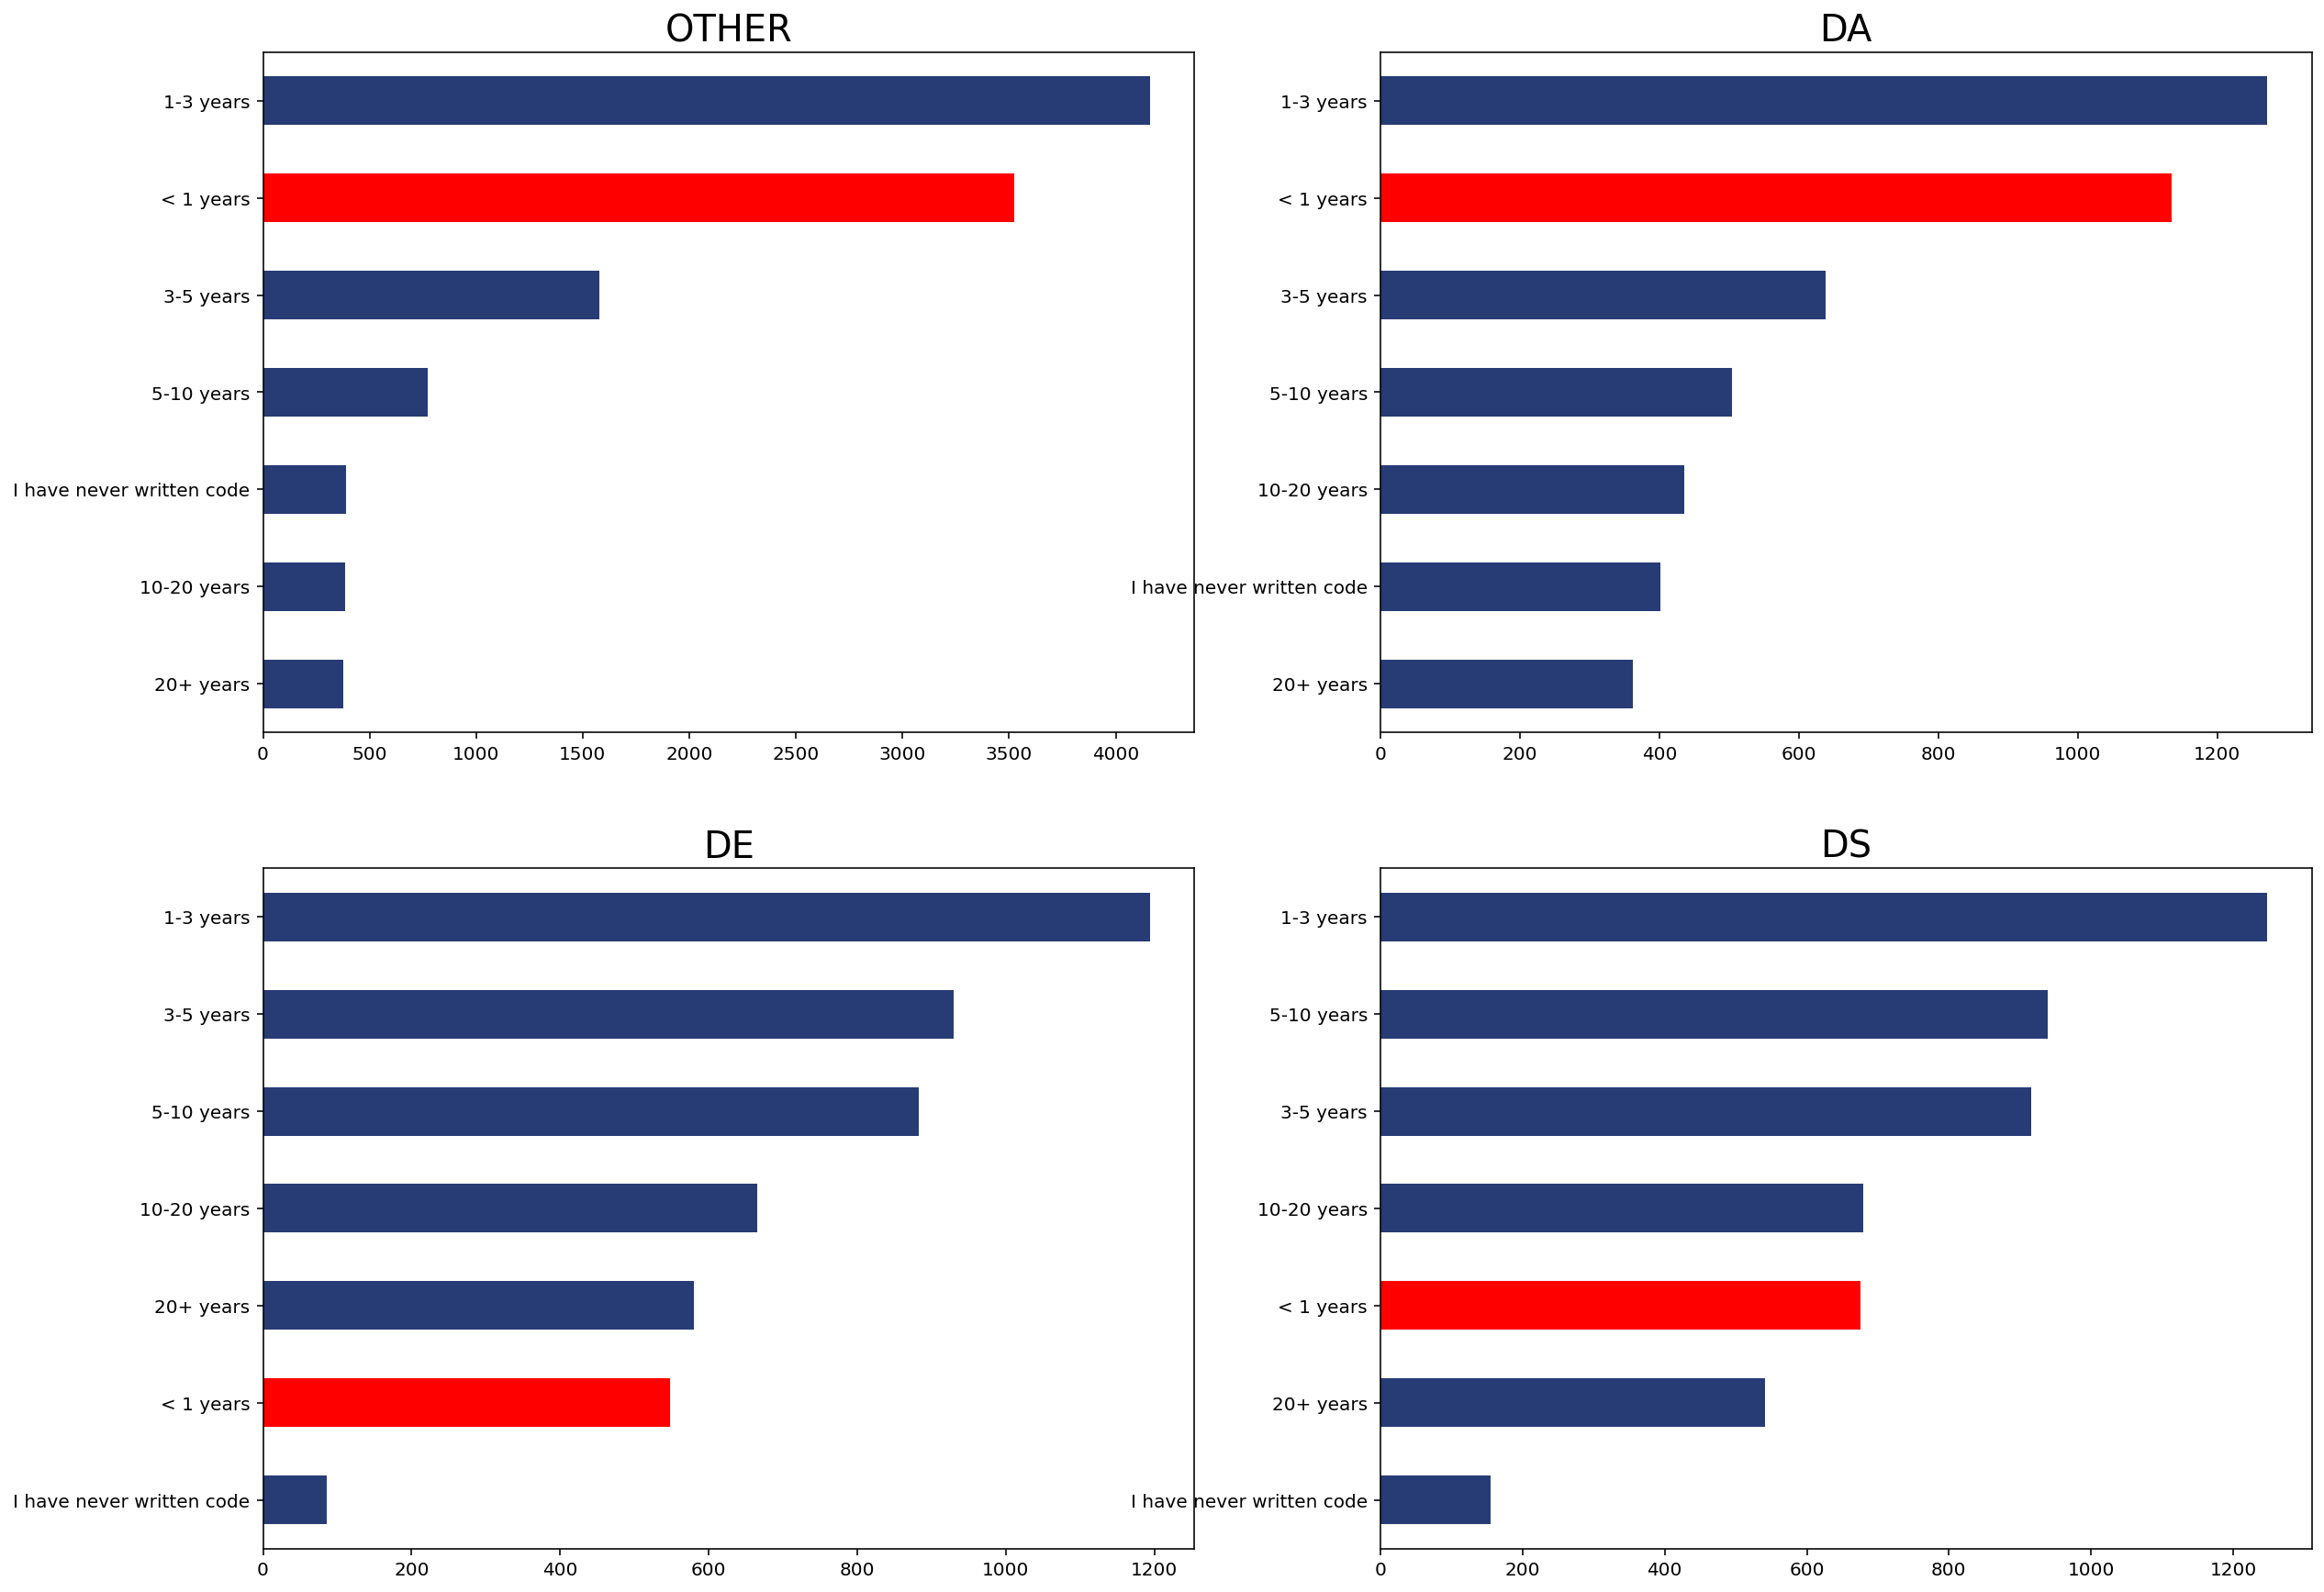

In [18]:
|plt.subplots(figsize=(20,15))
job = response['Q5'].unique()
length = len(job)
col_color = {'< 1 years':'r',
             'I have never written code':'#273c75',
             '1-3 years':'#273c75',
             '3-5 years':'#273c75',
             '5-10 years':'#273c75',
             '10-20 years':'#273c75',
             '20+ years':'#273c75'}

for i, j in itertools.zip_longest(job, range(length)):
  plt.subplot((length/2), 2, j+1)
  data = response[response['Q5'] == i]['Q6'].value_counts(ascending=True)
  data.plot(kind='barh', color=pd.DataFrame(data).reset_index()['index'].replace(col_color))
  plt.title(i, size=20)

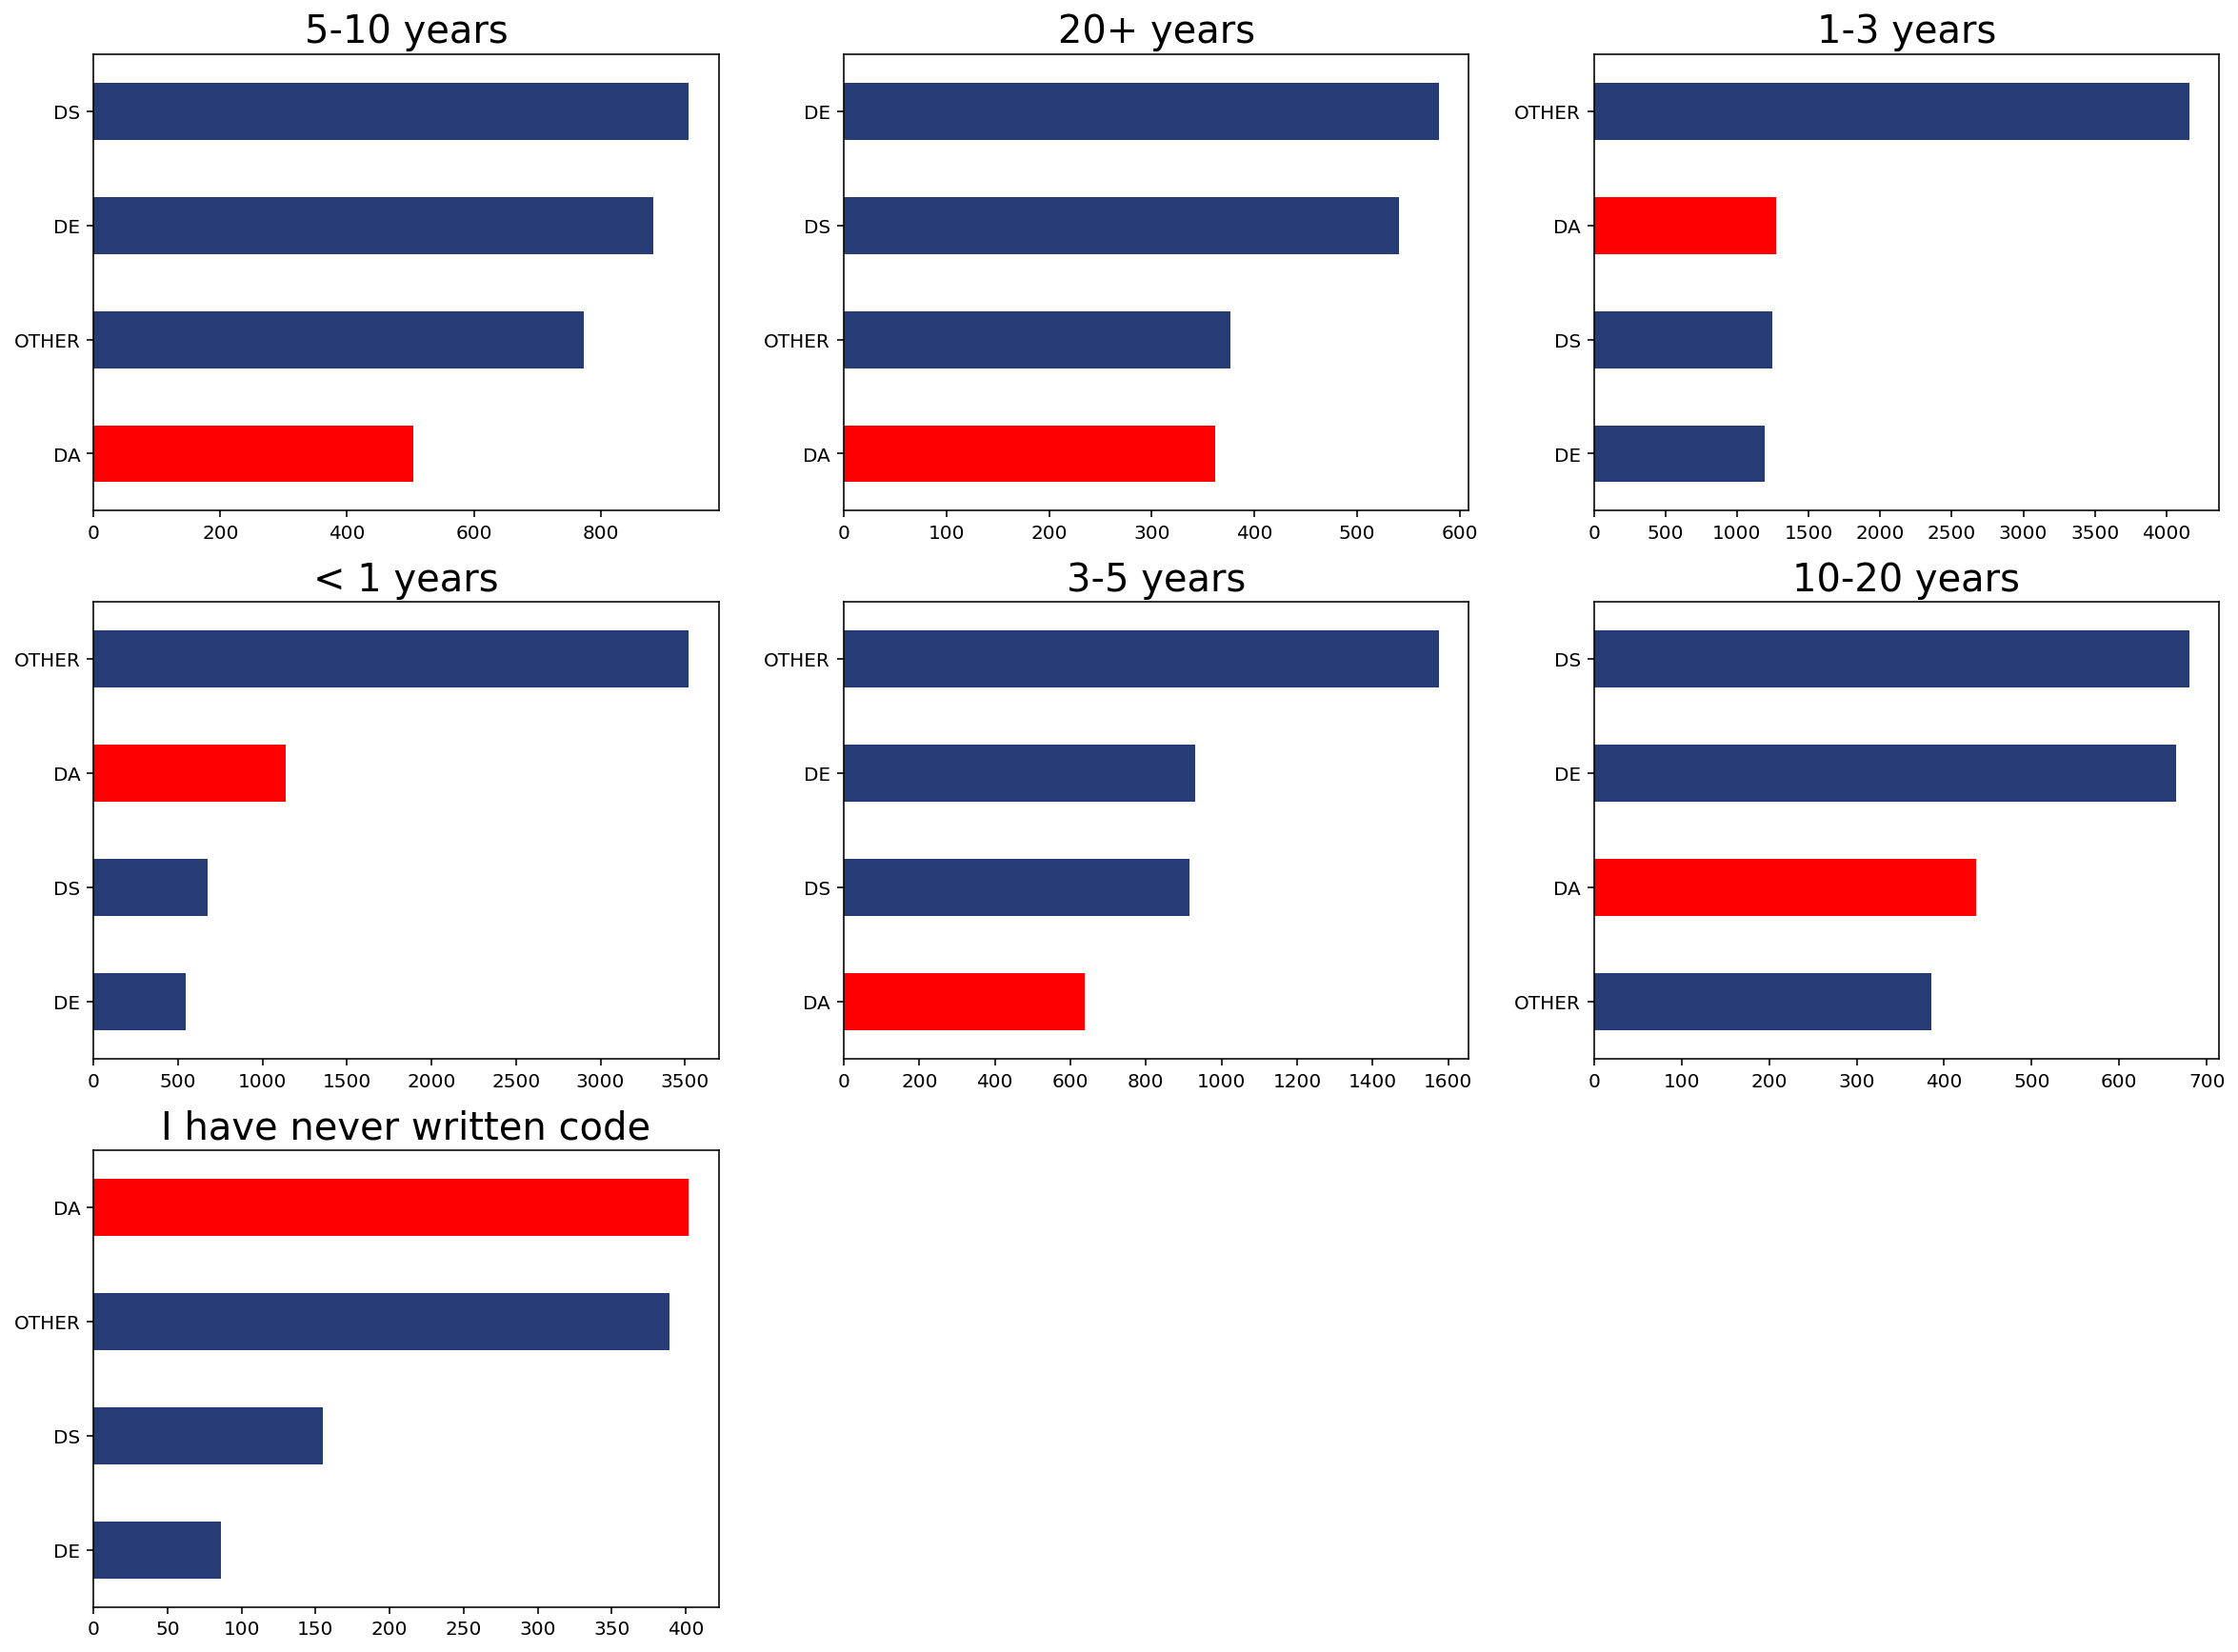

In [28]:
plt.subplots(figsize=(20,15))
exp = response['Q6'].unique()
length = len(exp)
col_color = {'DA':'r',
             'DE':'#273c75',
             'DS':'#273c75',
             'OTHER':'#273c75'}

for i, j in itertools.zip_longest(exp, range(length)):
  plt.subplot((length/2), 3, j+1)
  data = response[response['Q6'] == i]['Q5'].value_counts(ascending=True)
  data.plot(kind='barh', color=pd.DataFrame(data).reset_index()['index'].replace(col_color))
  plt.title(i, size=20)

### Q. 직군별로 어떤 언어를 주로 사용하시나요?

Q5	JobTitle
Q7	Language_regular

Q7 프로그래밍 사용 언어
- Python
- R
- SQL
- C
- C++
- Java
- Javascript
- Julia
- Swift
- Bash
- MATLAB
- None
- Other

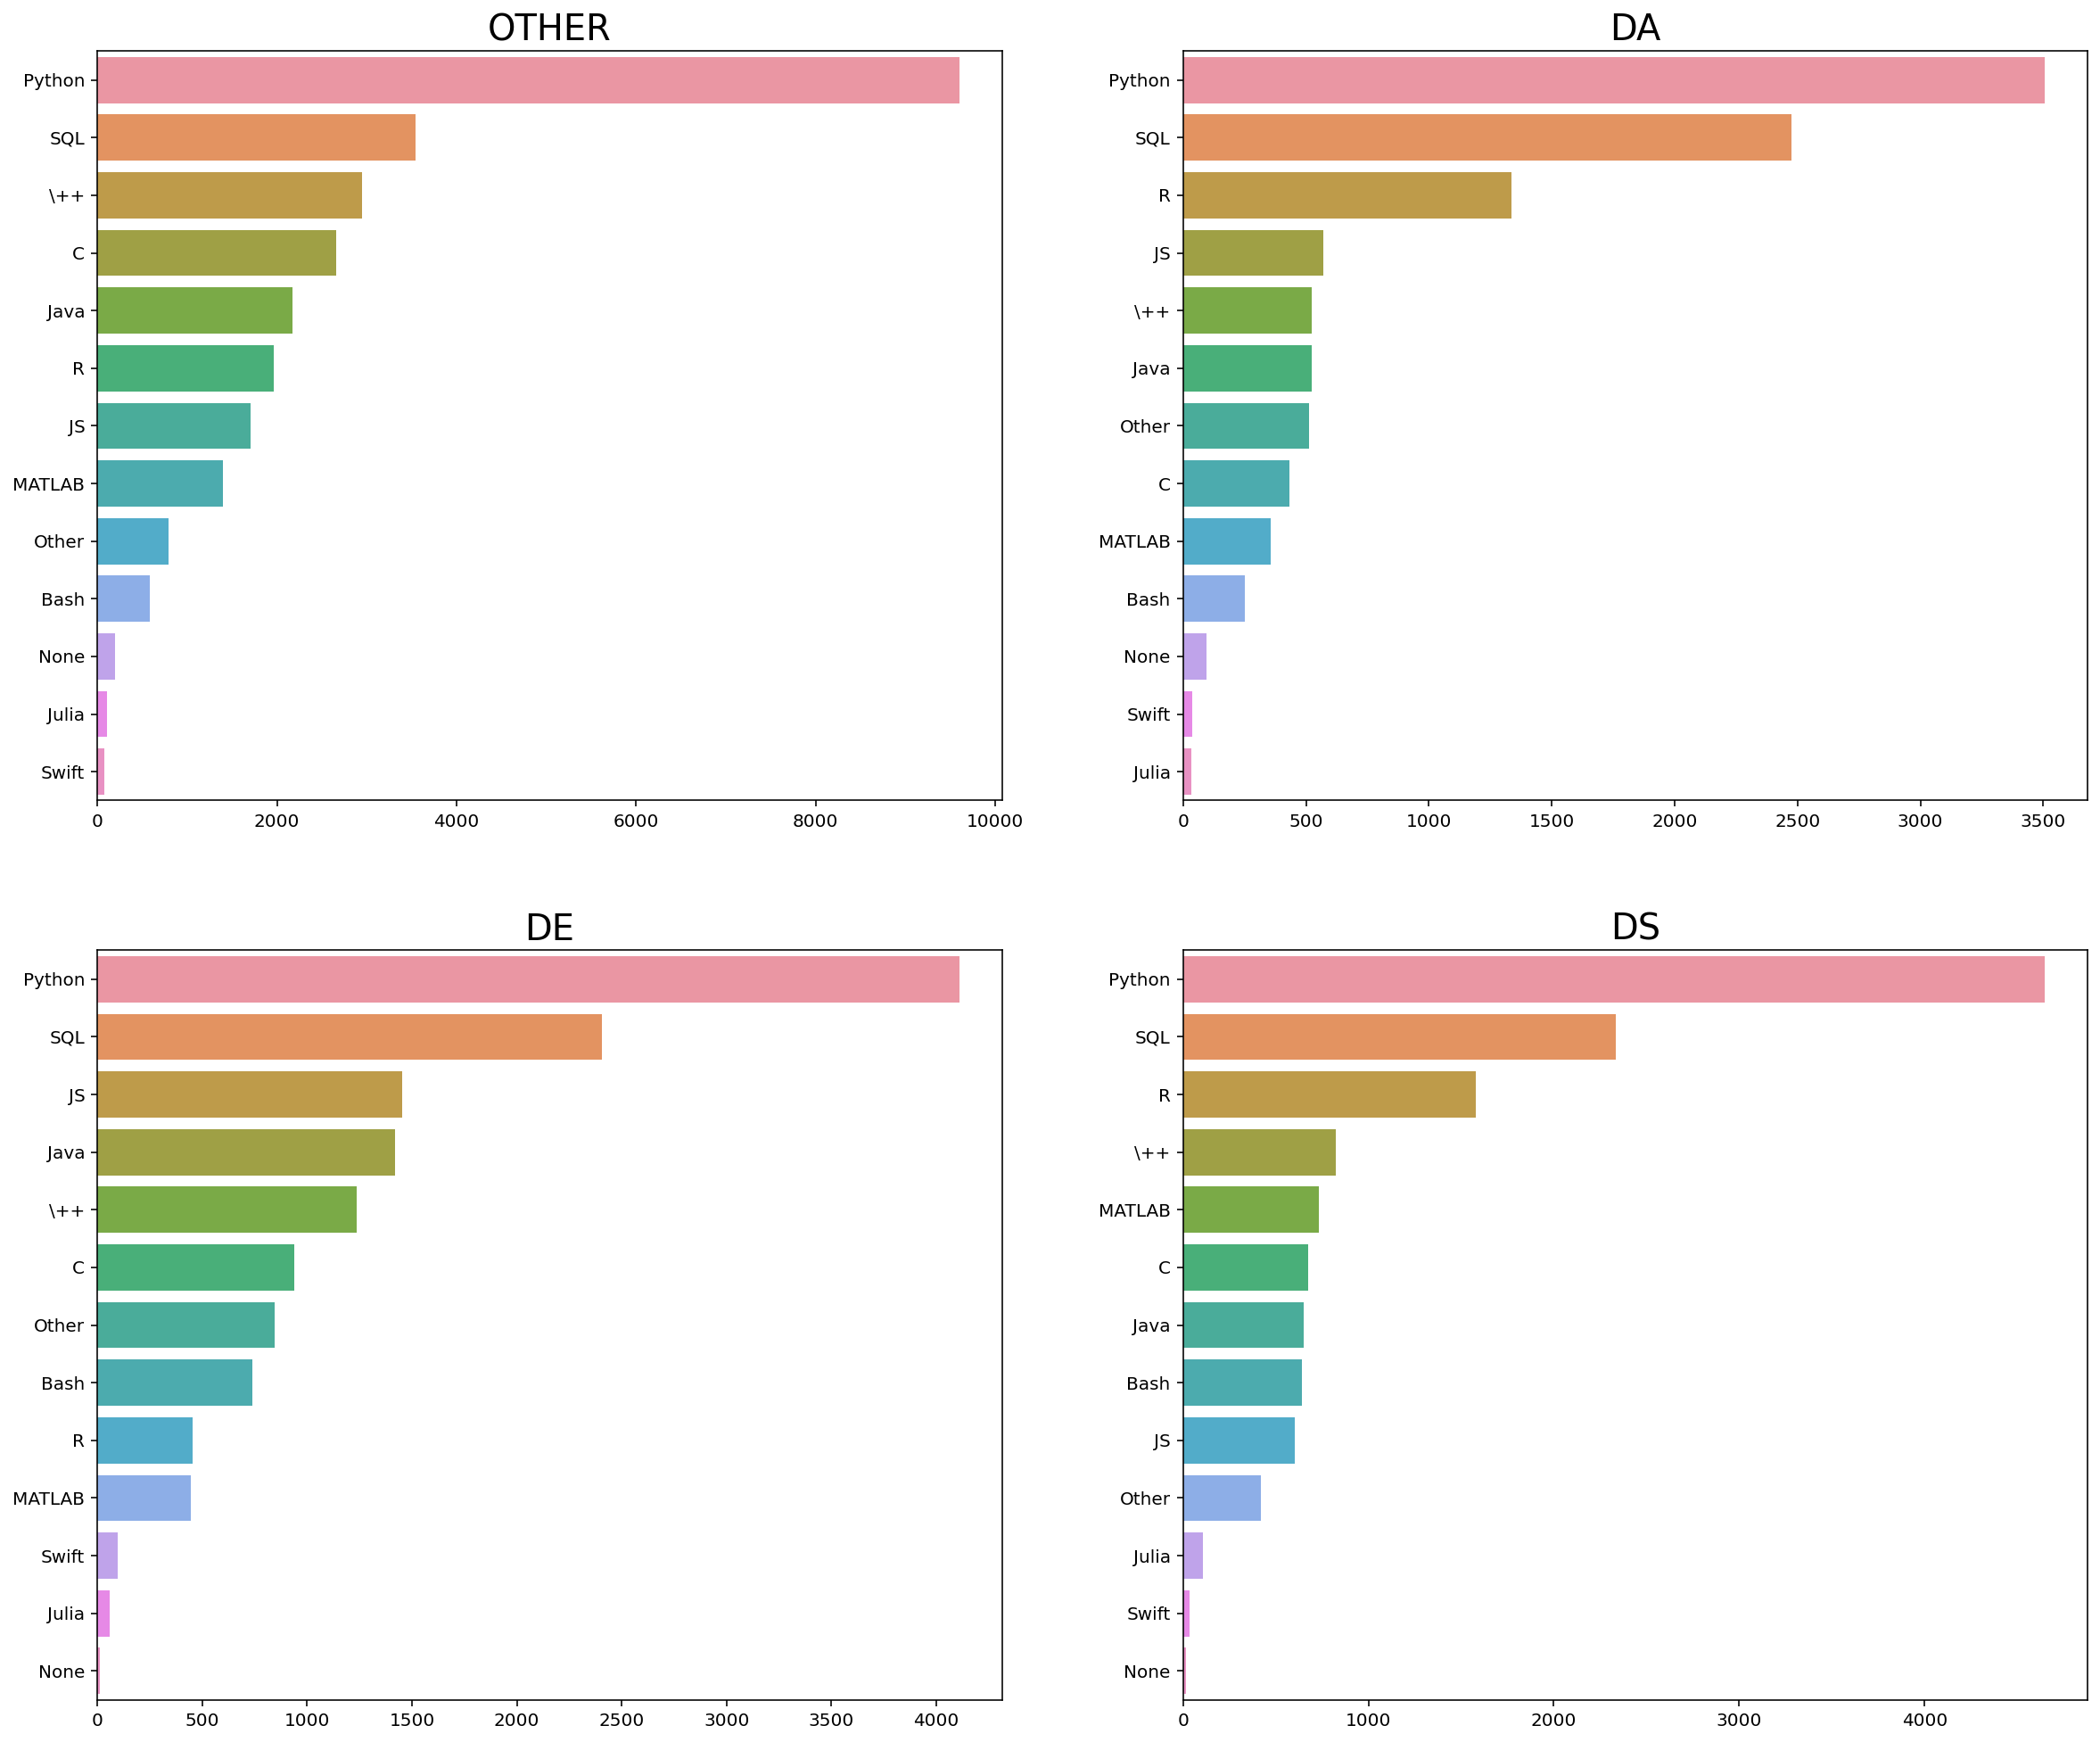

In [29]:
response['Q7'] = response['Q7'].str.replace('C\++', '++').str.replace('Javascript', 'JS')
lang = ['Python', 'R', 'SQL', 'C', '\++', 'Java', 'JS', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']
plt.subplots(figsize=(20,17))
job = response['Q5'].unique()
length = len(job)

for i, j in itertools.zip_longest(job, range(length)):
  plt.subplot((length/2), 2, j+1)
  data = response[response['Q5'] == i]  
  
  lan = []
  cnt = []
  for k in lang:
    lan.append(k)
    cnt.append(len(data[data['Q7'].str.contains(k)]))
  
  df = pd.DataFrame(columns=["language", 'cnt'])
  df['language'] = lan
  df['cnt'] = cnt
  df = df.sort_values(by='cnt', ascending=False)
  sns.barplot(data=df, y='language', x='cnt')
  plt.title(i, size=20)
  plt.xlabel('')
  plt.ylabel('')

### Q. 직군별 주 사용 IDE는 무엇인가요?

Q9 주 사용 IDE

In [30]:
idle = ['JupyterLab', 'RStudio', 'Visual Studio', 'VSCode', 'PyCharm', 'Spyder', 'Notepad',
        'Sublime Text', 'Vim, Emacs, or similar', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']

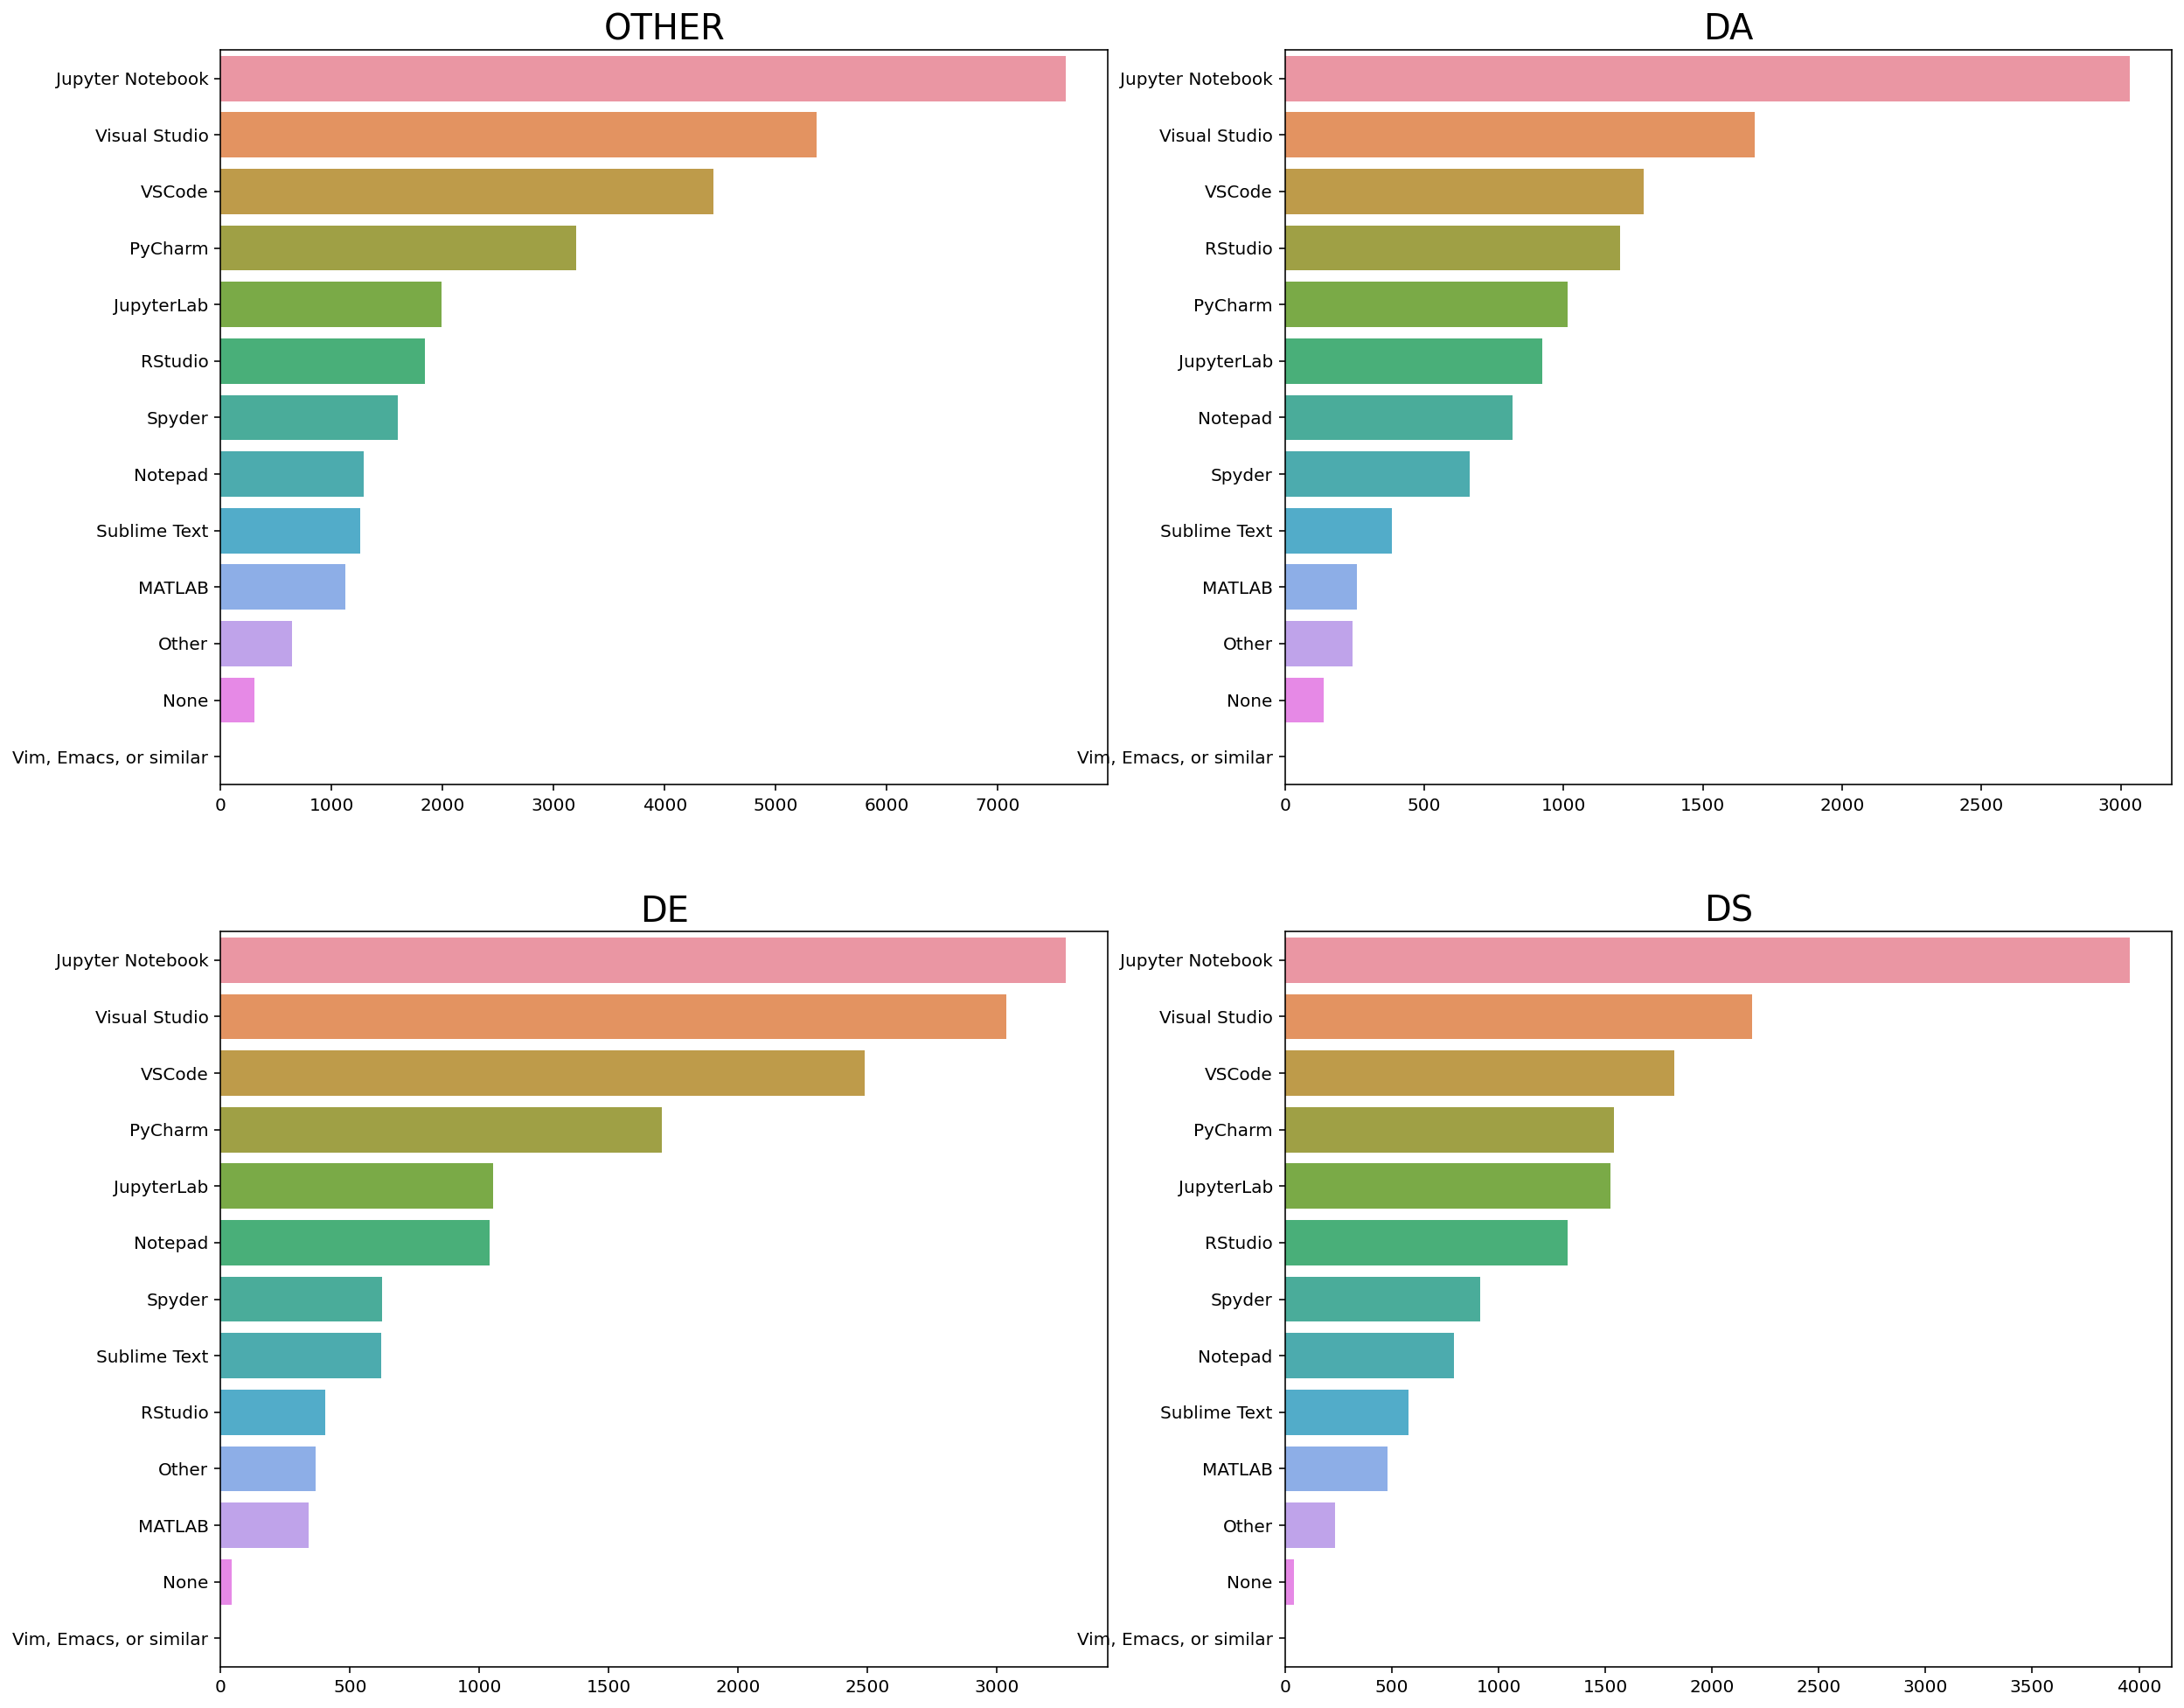

In [31]:
plt.subplots(figsize=(20,17))
job = response['Q5'].unique()
length = len(job)

for i, j in itertools.zip_longest(job, range(length)):
  plt.subplot((length/2), 2, j+1)
  data = response[response['Q5'] == i]  
  
  ide = []
  cnt = []
  for k in idle:
    ide.append(k)
    cnt.append(len(data[data['Q9'].str.contains(k)]))
  
  df = pd.DataFrame(columns=["ide", 'cnt'])
  df['ide'] = ide
  df['cnt'] = cnt
  df = df.sort_values(by='cnt', ascending=False)
  sns.barplot(data=df, y='ide', x='cnt')
  plt.title(i, size=20)
  plt.xlabel('')
  plt.ylabel('')

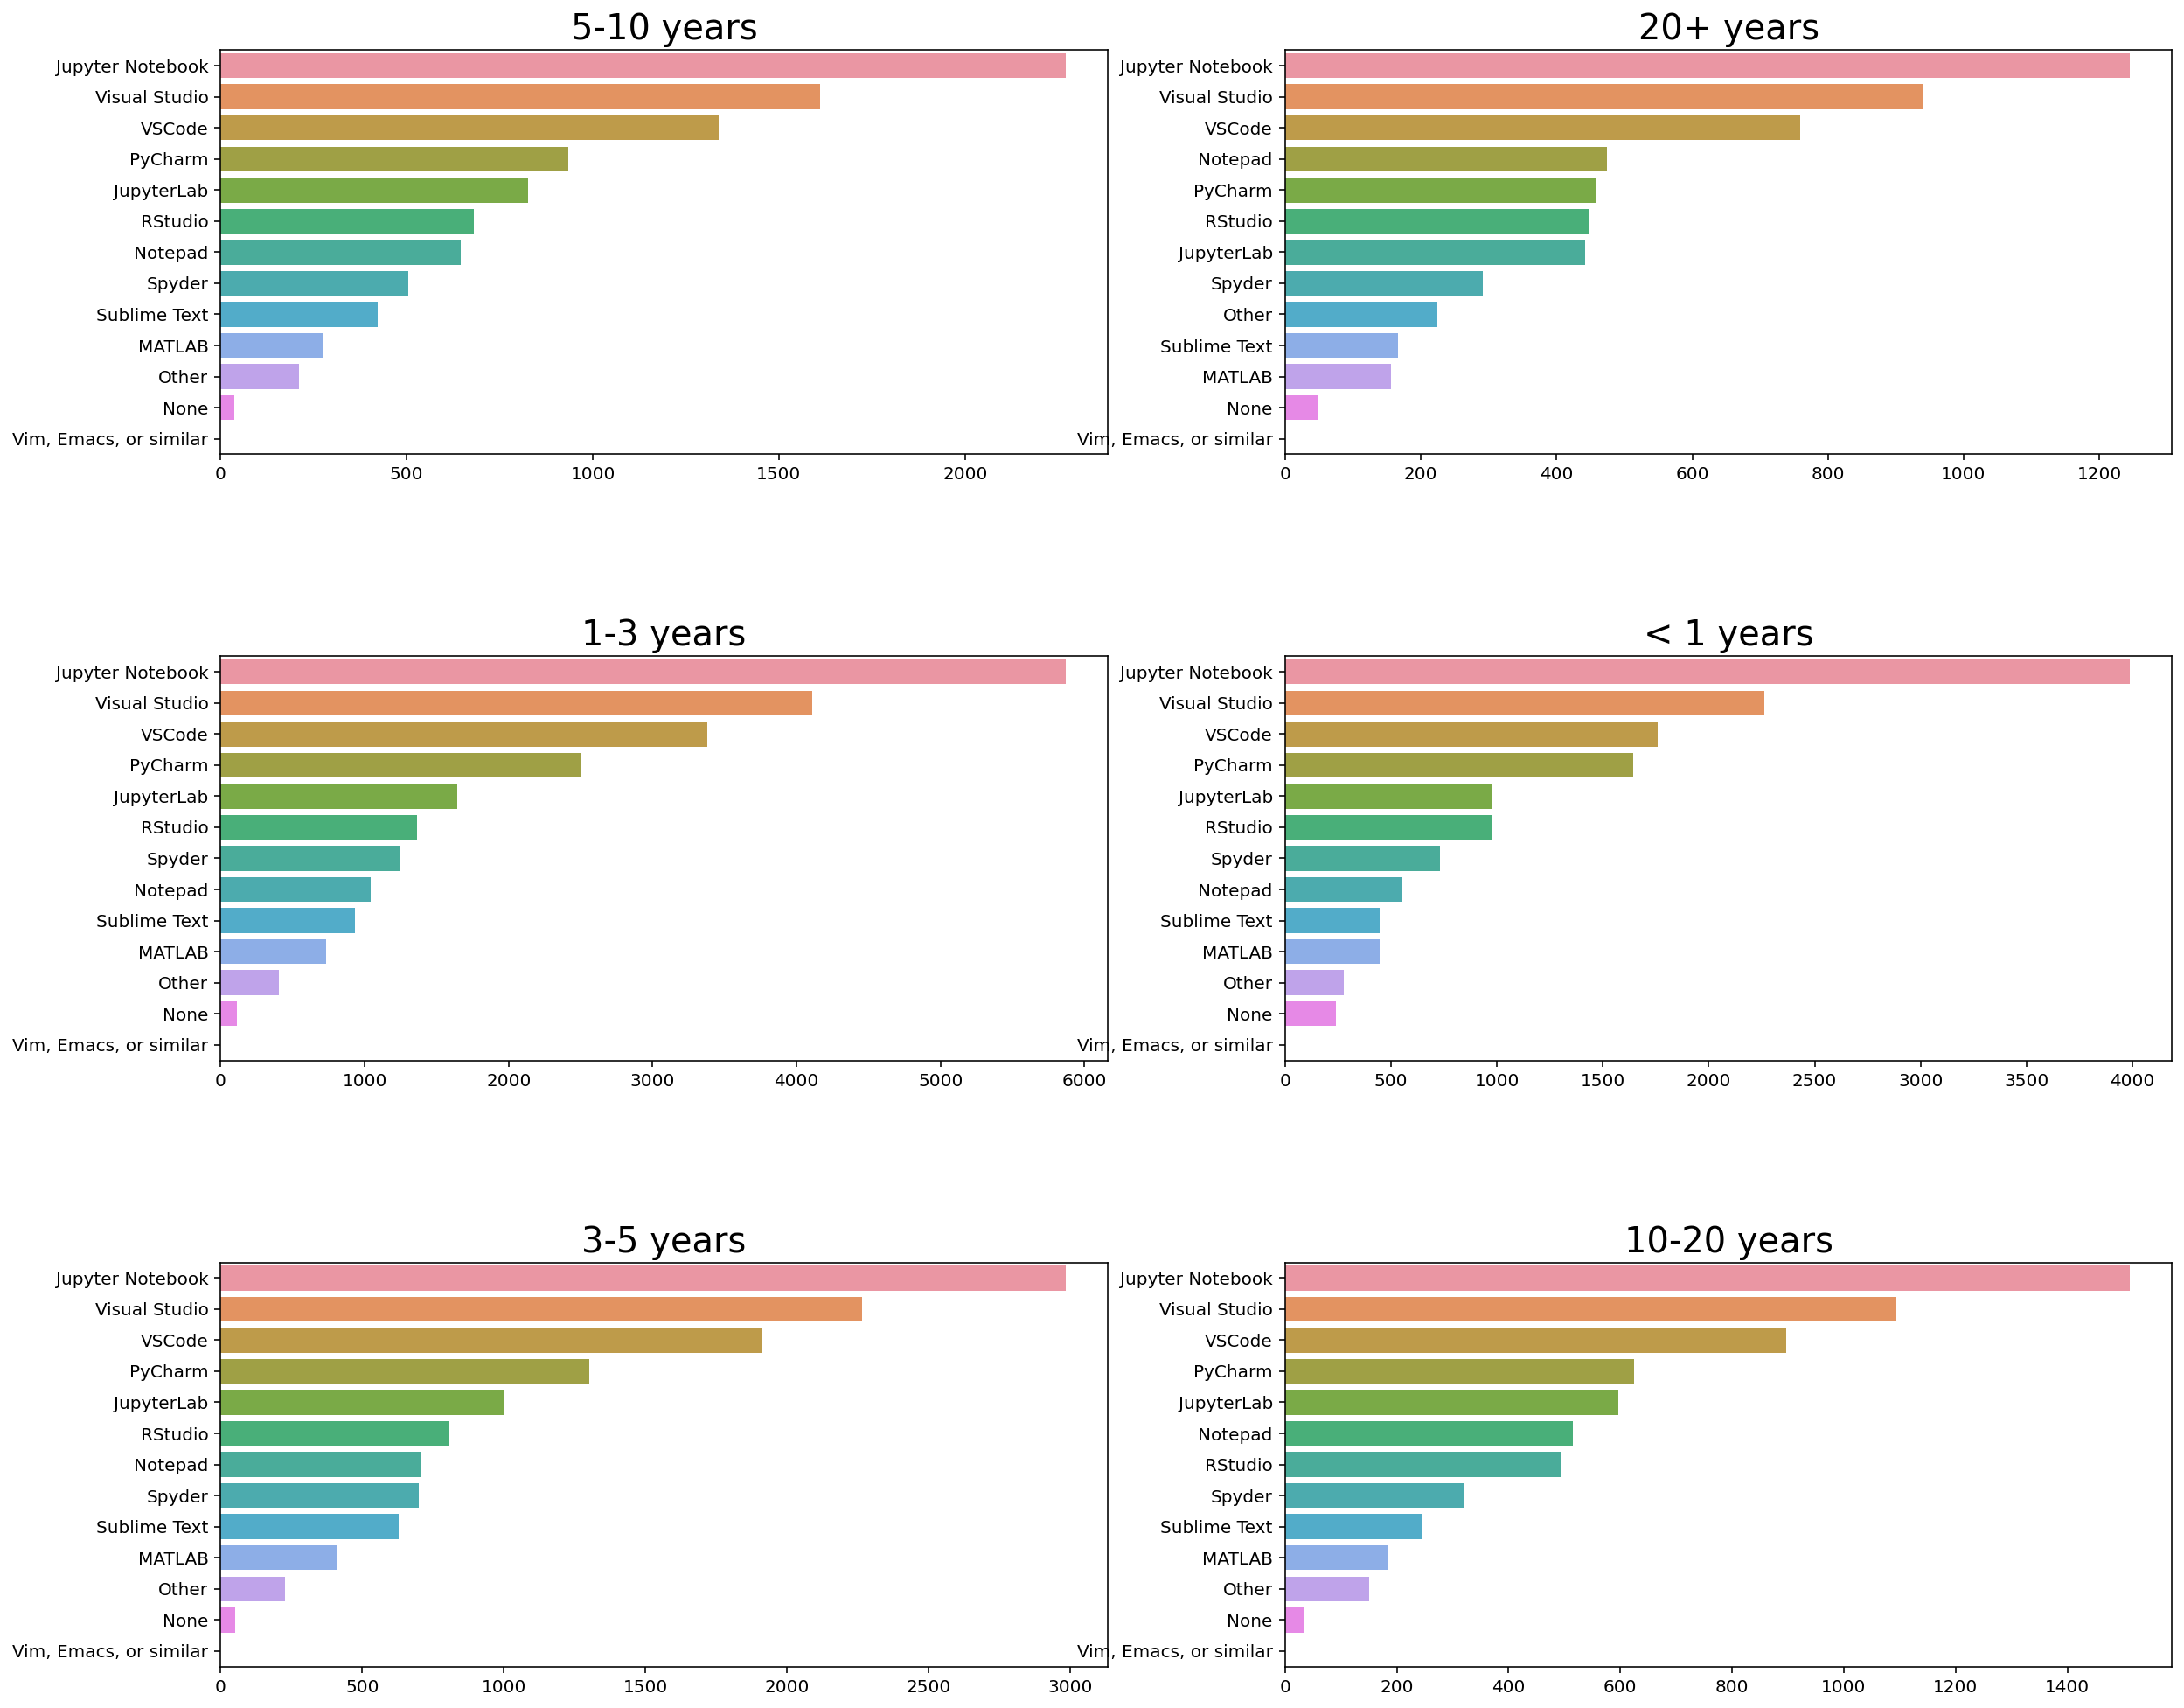

In [32]:
plt.subplots(figsize=(20,17))
exp = response['Q6'].unique()
exp = np.delete(exp, 6) # 'I have never written code' 코딩경험이 없기 때문에 삭제
length = len(exp)

for i, j in itertools.zip_longest(exp, range(length)):
  plt.subplot((length/2), 2, j+1)
  data = response[response['Q6'] == i]  
  
  ide = []
  cnt = []
  for k in idle:
    ide.append(k)
    cnt.append(len(data[data['Q9'].str.contains(k)]))
  
  df = pd.DataFrame(columns=["ide", 'cnt'])
  df['ide'] = ide
  df['cnt'] = cnt
  df = df.sort_values(by='cnt', ascending=False)
  sns.barplot(data=df, y='ide', x='cnt')
  plt.title(i, size=20)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
  plt.xlabel('')
  plt.ylabel('')

### Q. 직군별로 평소에 사용하는 시각화 라이브러리는 무엇인가요?
Q14 시각화 툴

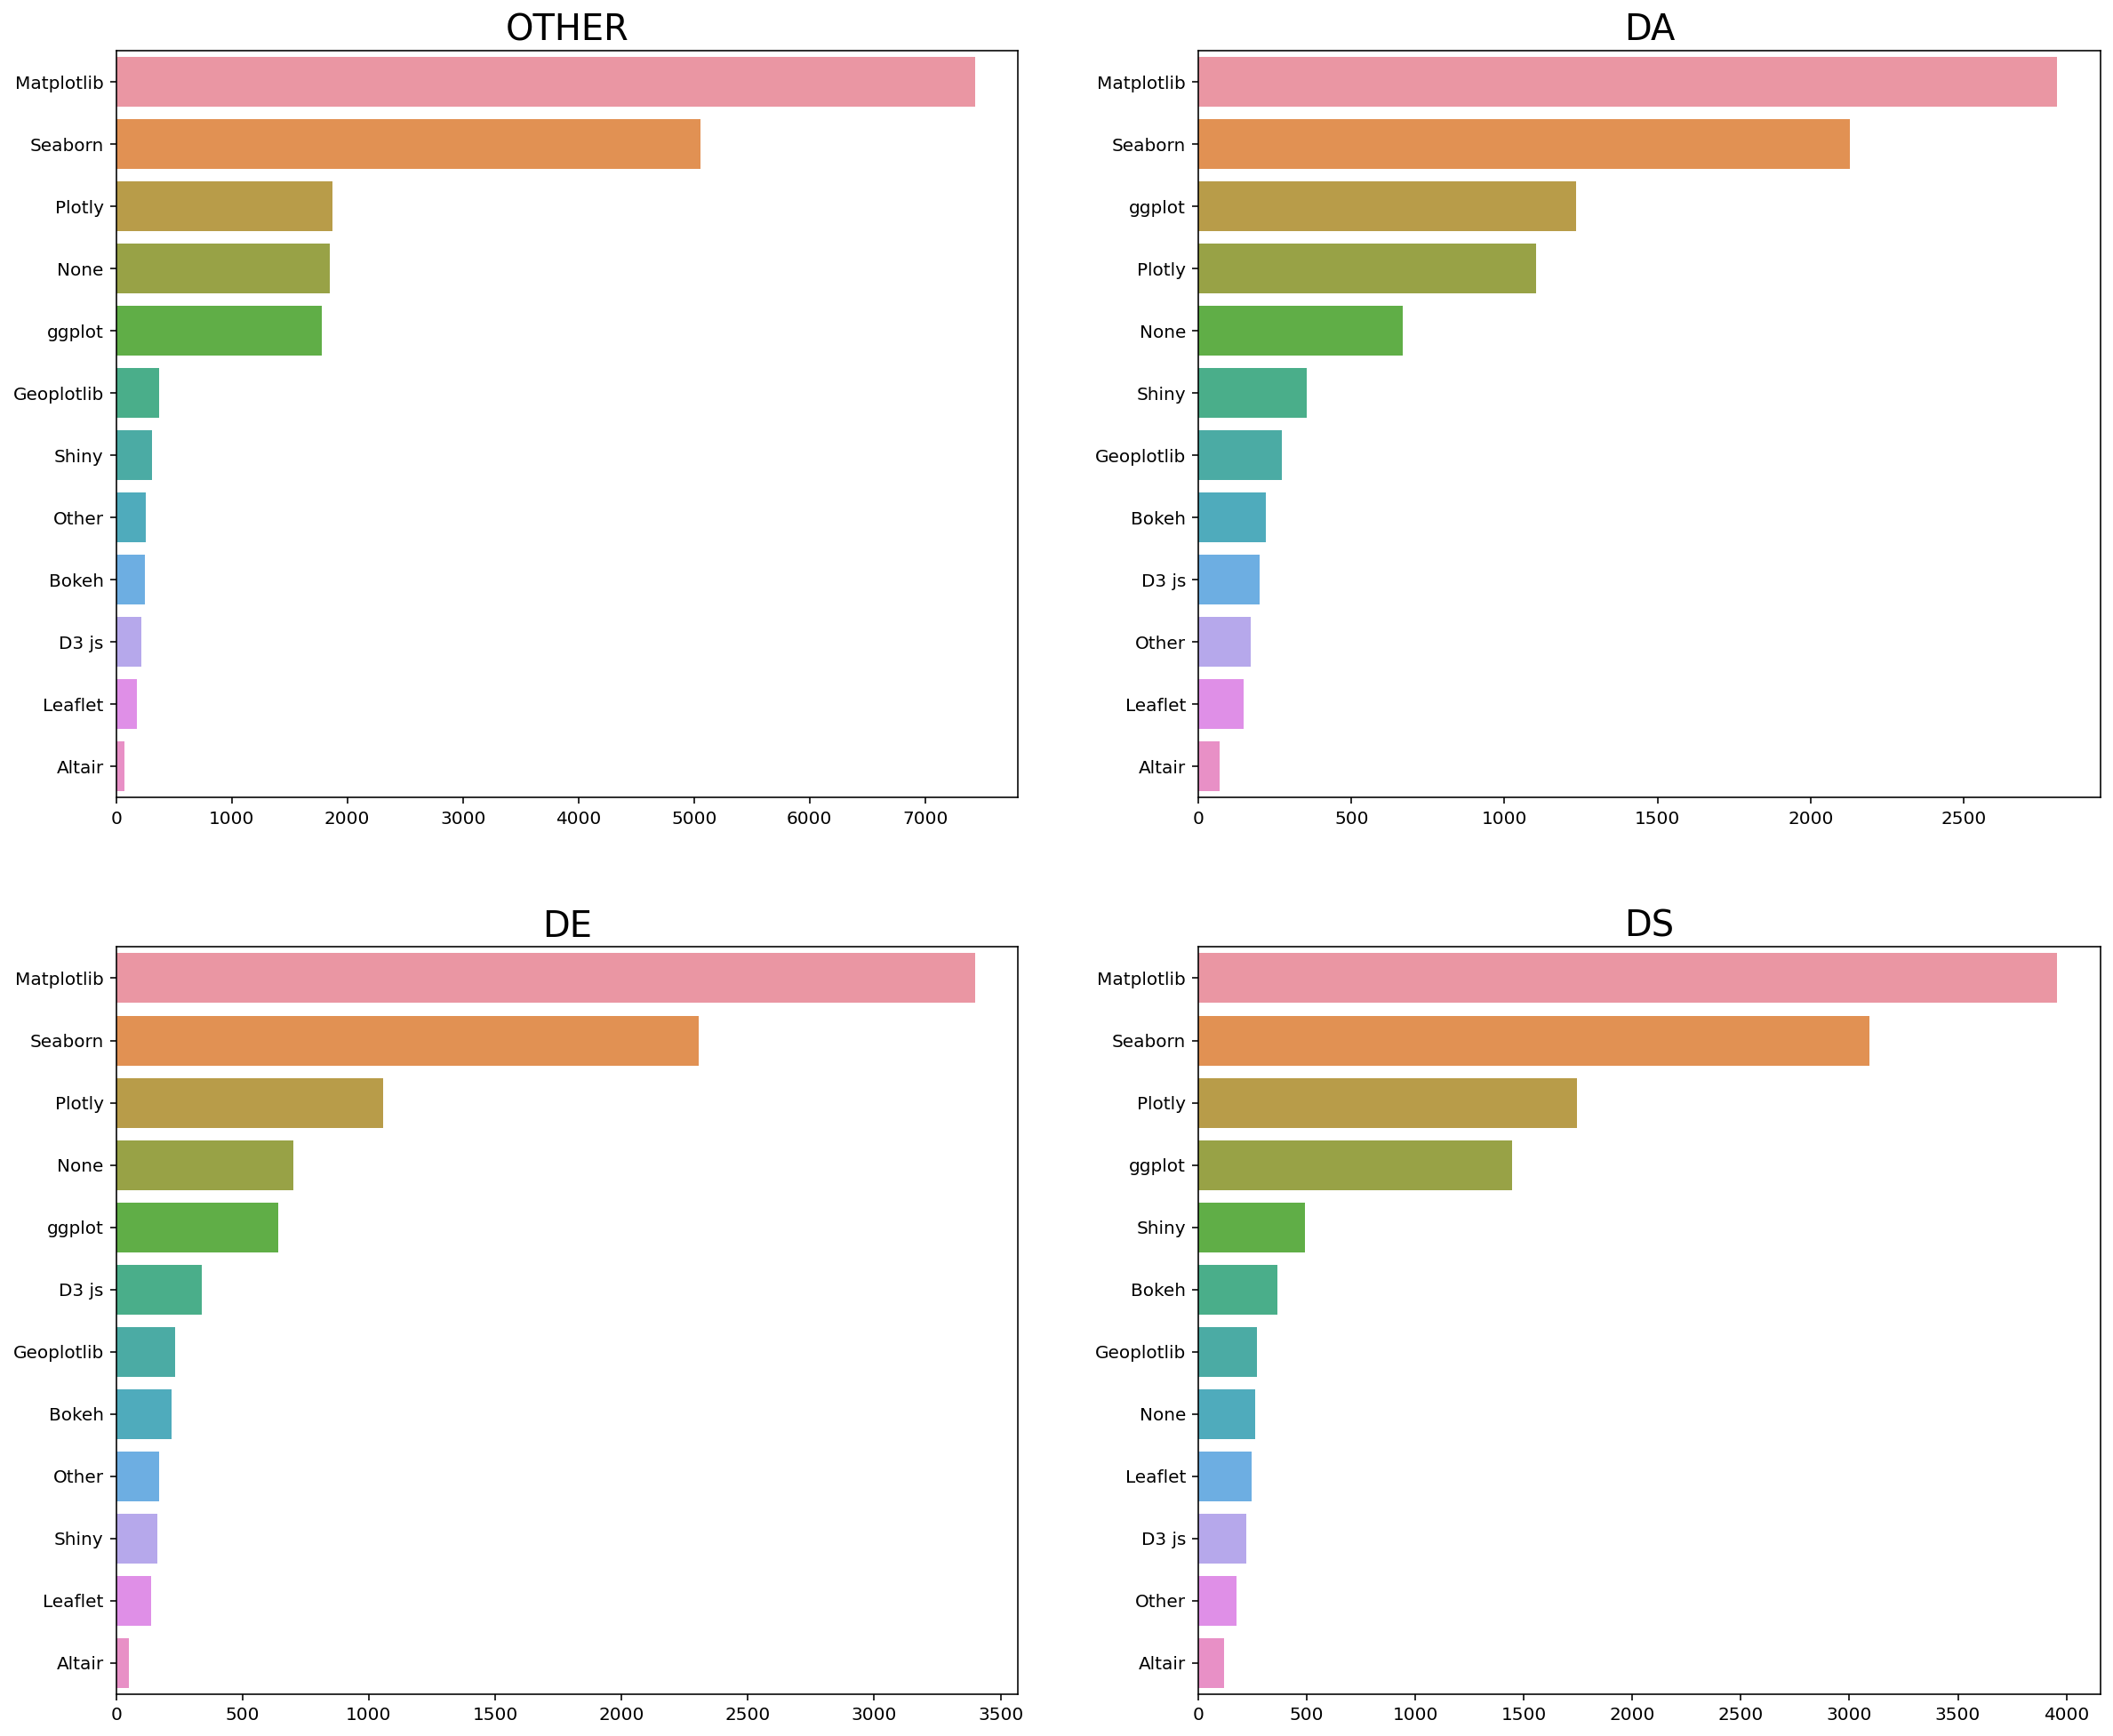

In [33]:
visual = ['Matplotlib', 'Seaborn', 'Plotly', 'ggplot', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib',
       'Leaflet', 'None', 'Other']

plt.subplots(figsize=(20,17))
job = response['Q5'].unique()
length = len(job)

for i, j in itertools.zip_longest(job, range(length)):
  plt.subplot((length/2), 2, j+1)
  data = response[response['Q5'] == i]  
  
  vis = []
  cnt = []
  for k in visual:
    vis.append(k)
    cnt.append(len(data[data['Q14'].str.contains(k)]))
  
  df = pd.DataFrame(columns=["vis", 'cnt'])
  df['vis'] = vis
  df['cnt'] = cnt
  df = df.sort_values(by='cnt', ascending=False)
  sns.barplot(data=df, y='vis', x='cnt')
  plt.title(i, size=20)
  plt.xlabel('')
  plt.ylabel('')

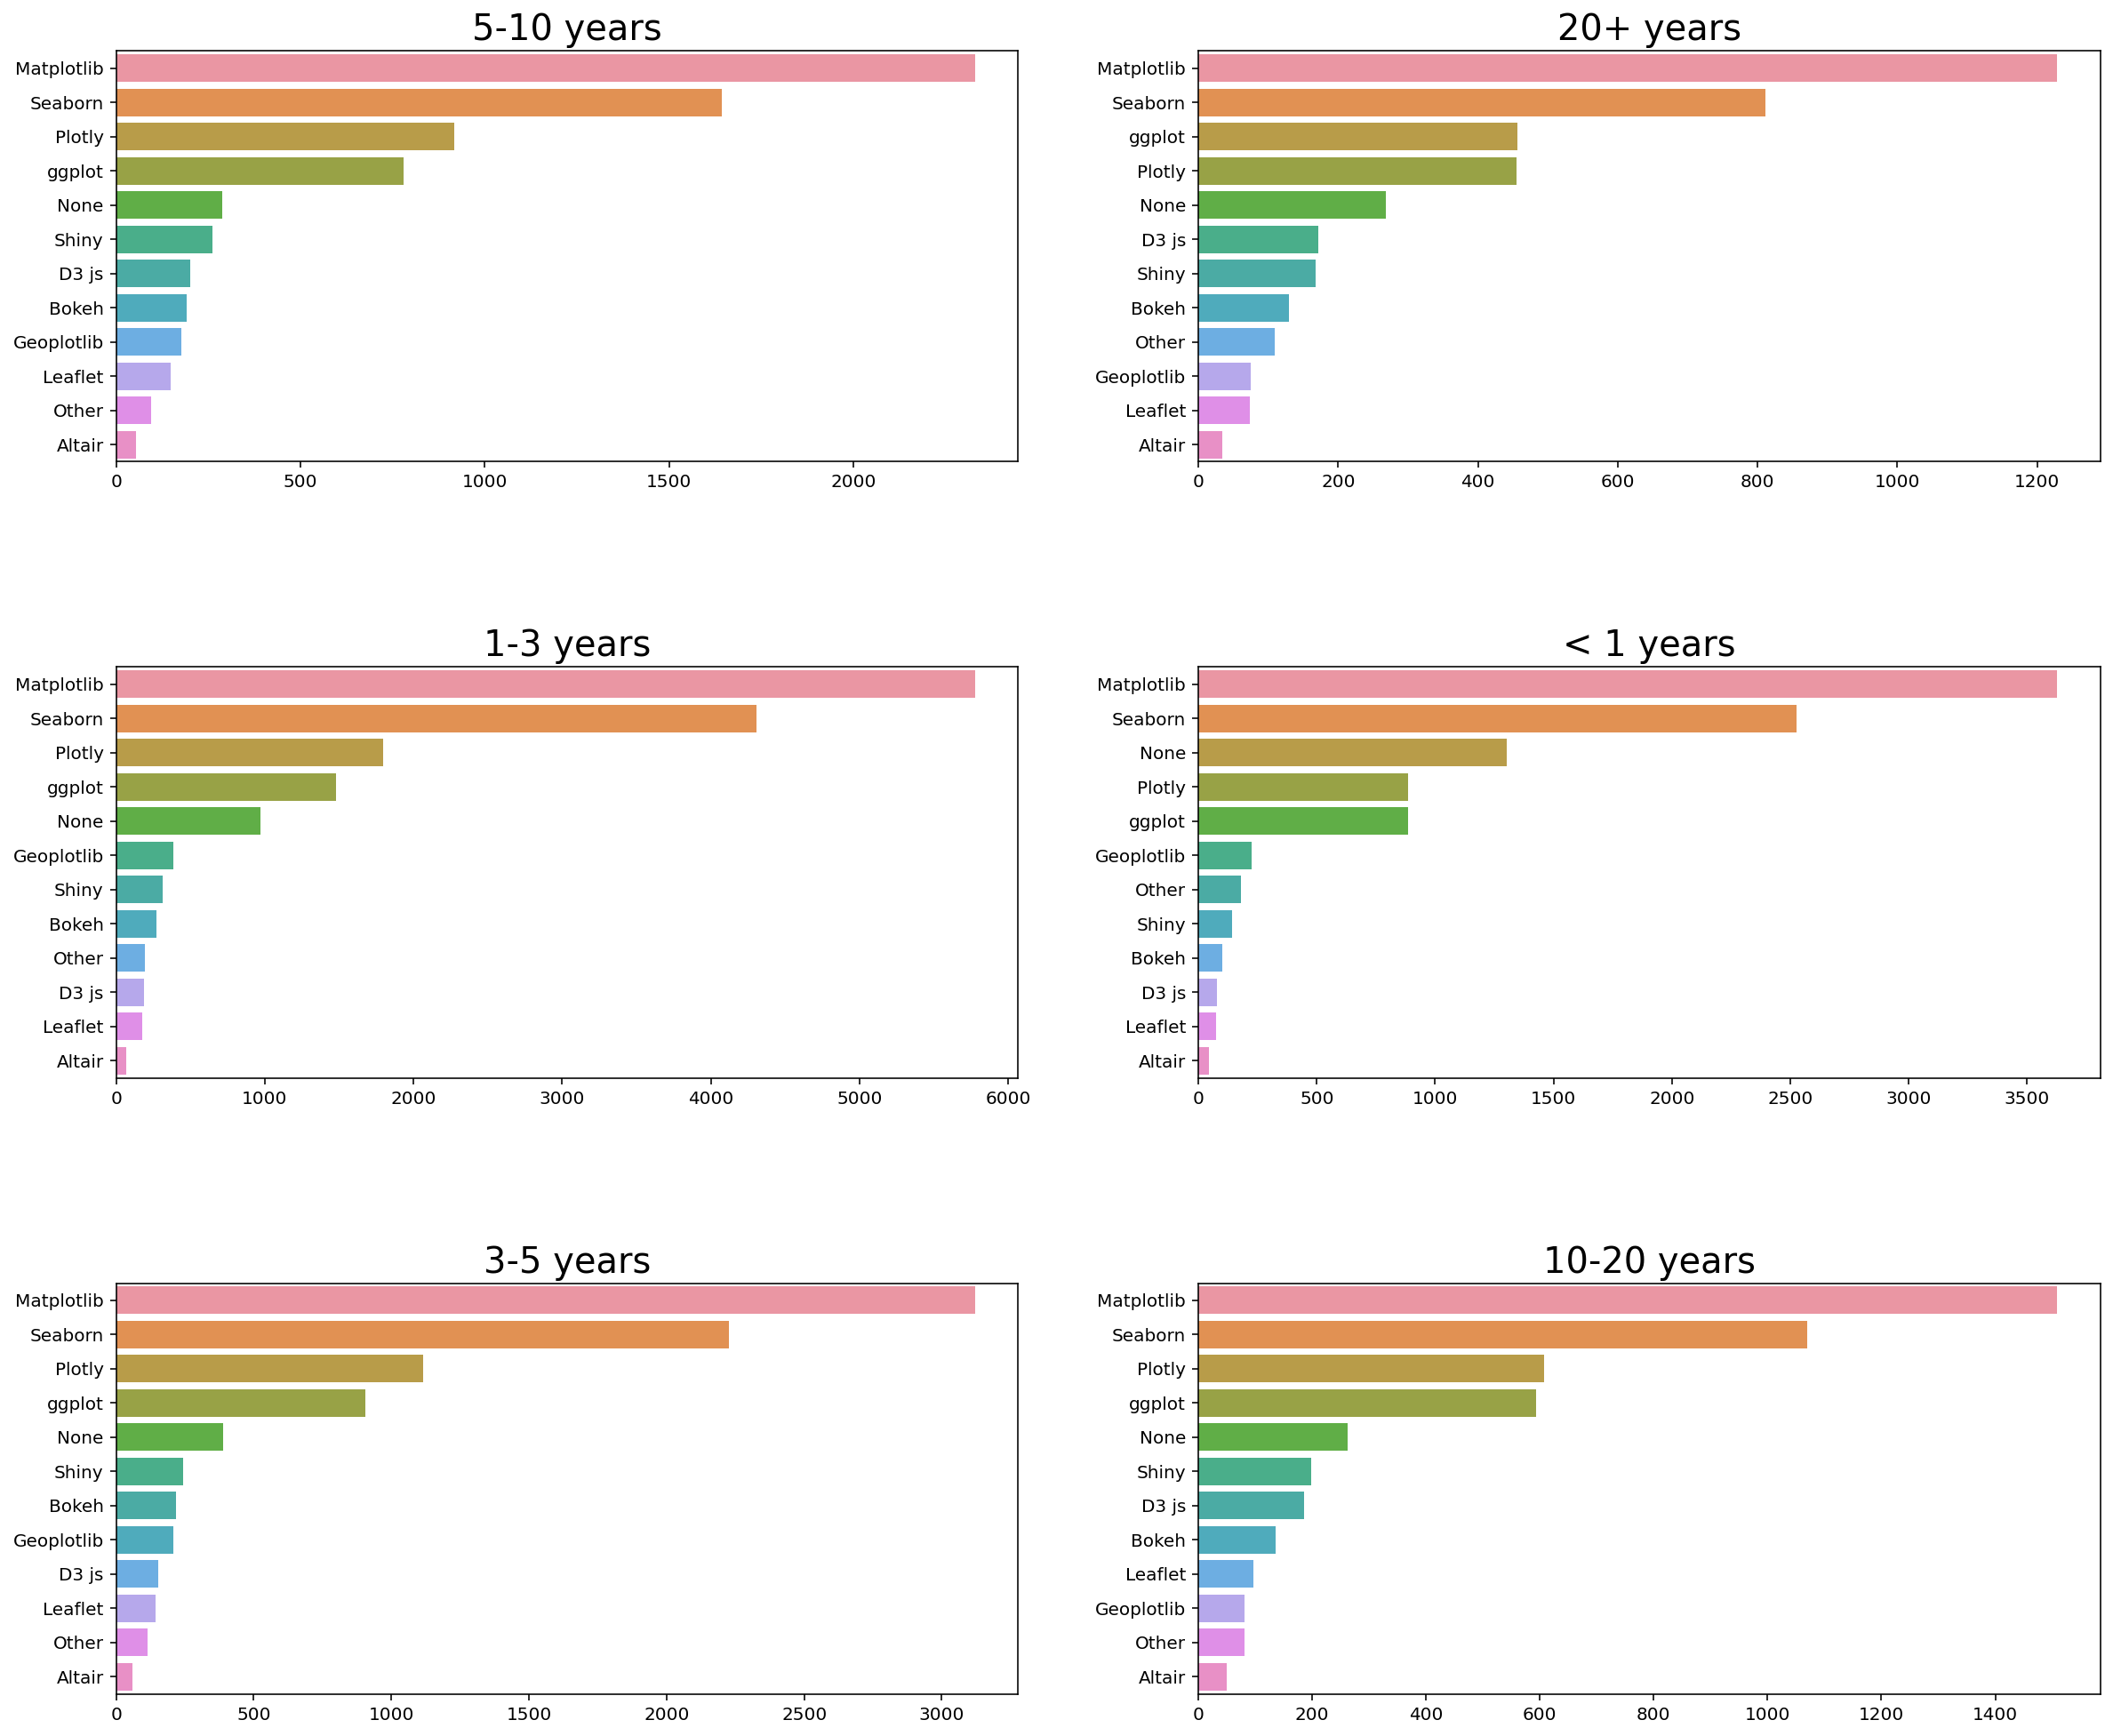

In [34]:
plt.subplots(figsize=(20,17))
exp = response['Q6'].unique()
exp = np.delete(exp, 6) # 'I have never written code' 코딩경험이 없기 때문에 삭제
length = len(exp)

for i, j in itertools.zip_longest(exp, range(length)):
  plt.subplot((length/2), 2, j+1)
  data = response[response['Q6'] == i]  
  
  vis = []
  cnt = []
  for k in visual:
    vis.append(k)
    cnt.append(len(data[data['Q14'].str.contains(k)]))
  
  df = pd.DataFrame(columns=["vis", 'cnt'])
  df['vis'] = vis
  df['cnt'] = cnt
  df = df.sort_values(by='cnt', ascending=False)
  sns.barplot(data=df, y='vis', x='cnt')
  plt.title(i, size=20)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
  plt.xlabel('')
  plt.ylabel('')

### Q. 직군별 ML 방법론을 사용한 연수는 어떻게 되나요?
Q15 ML 사용 연수

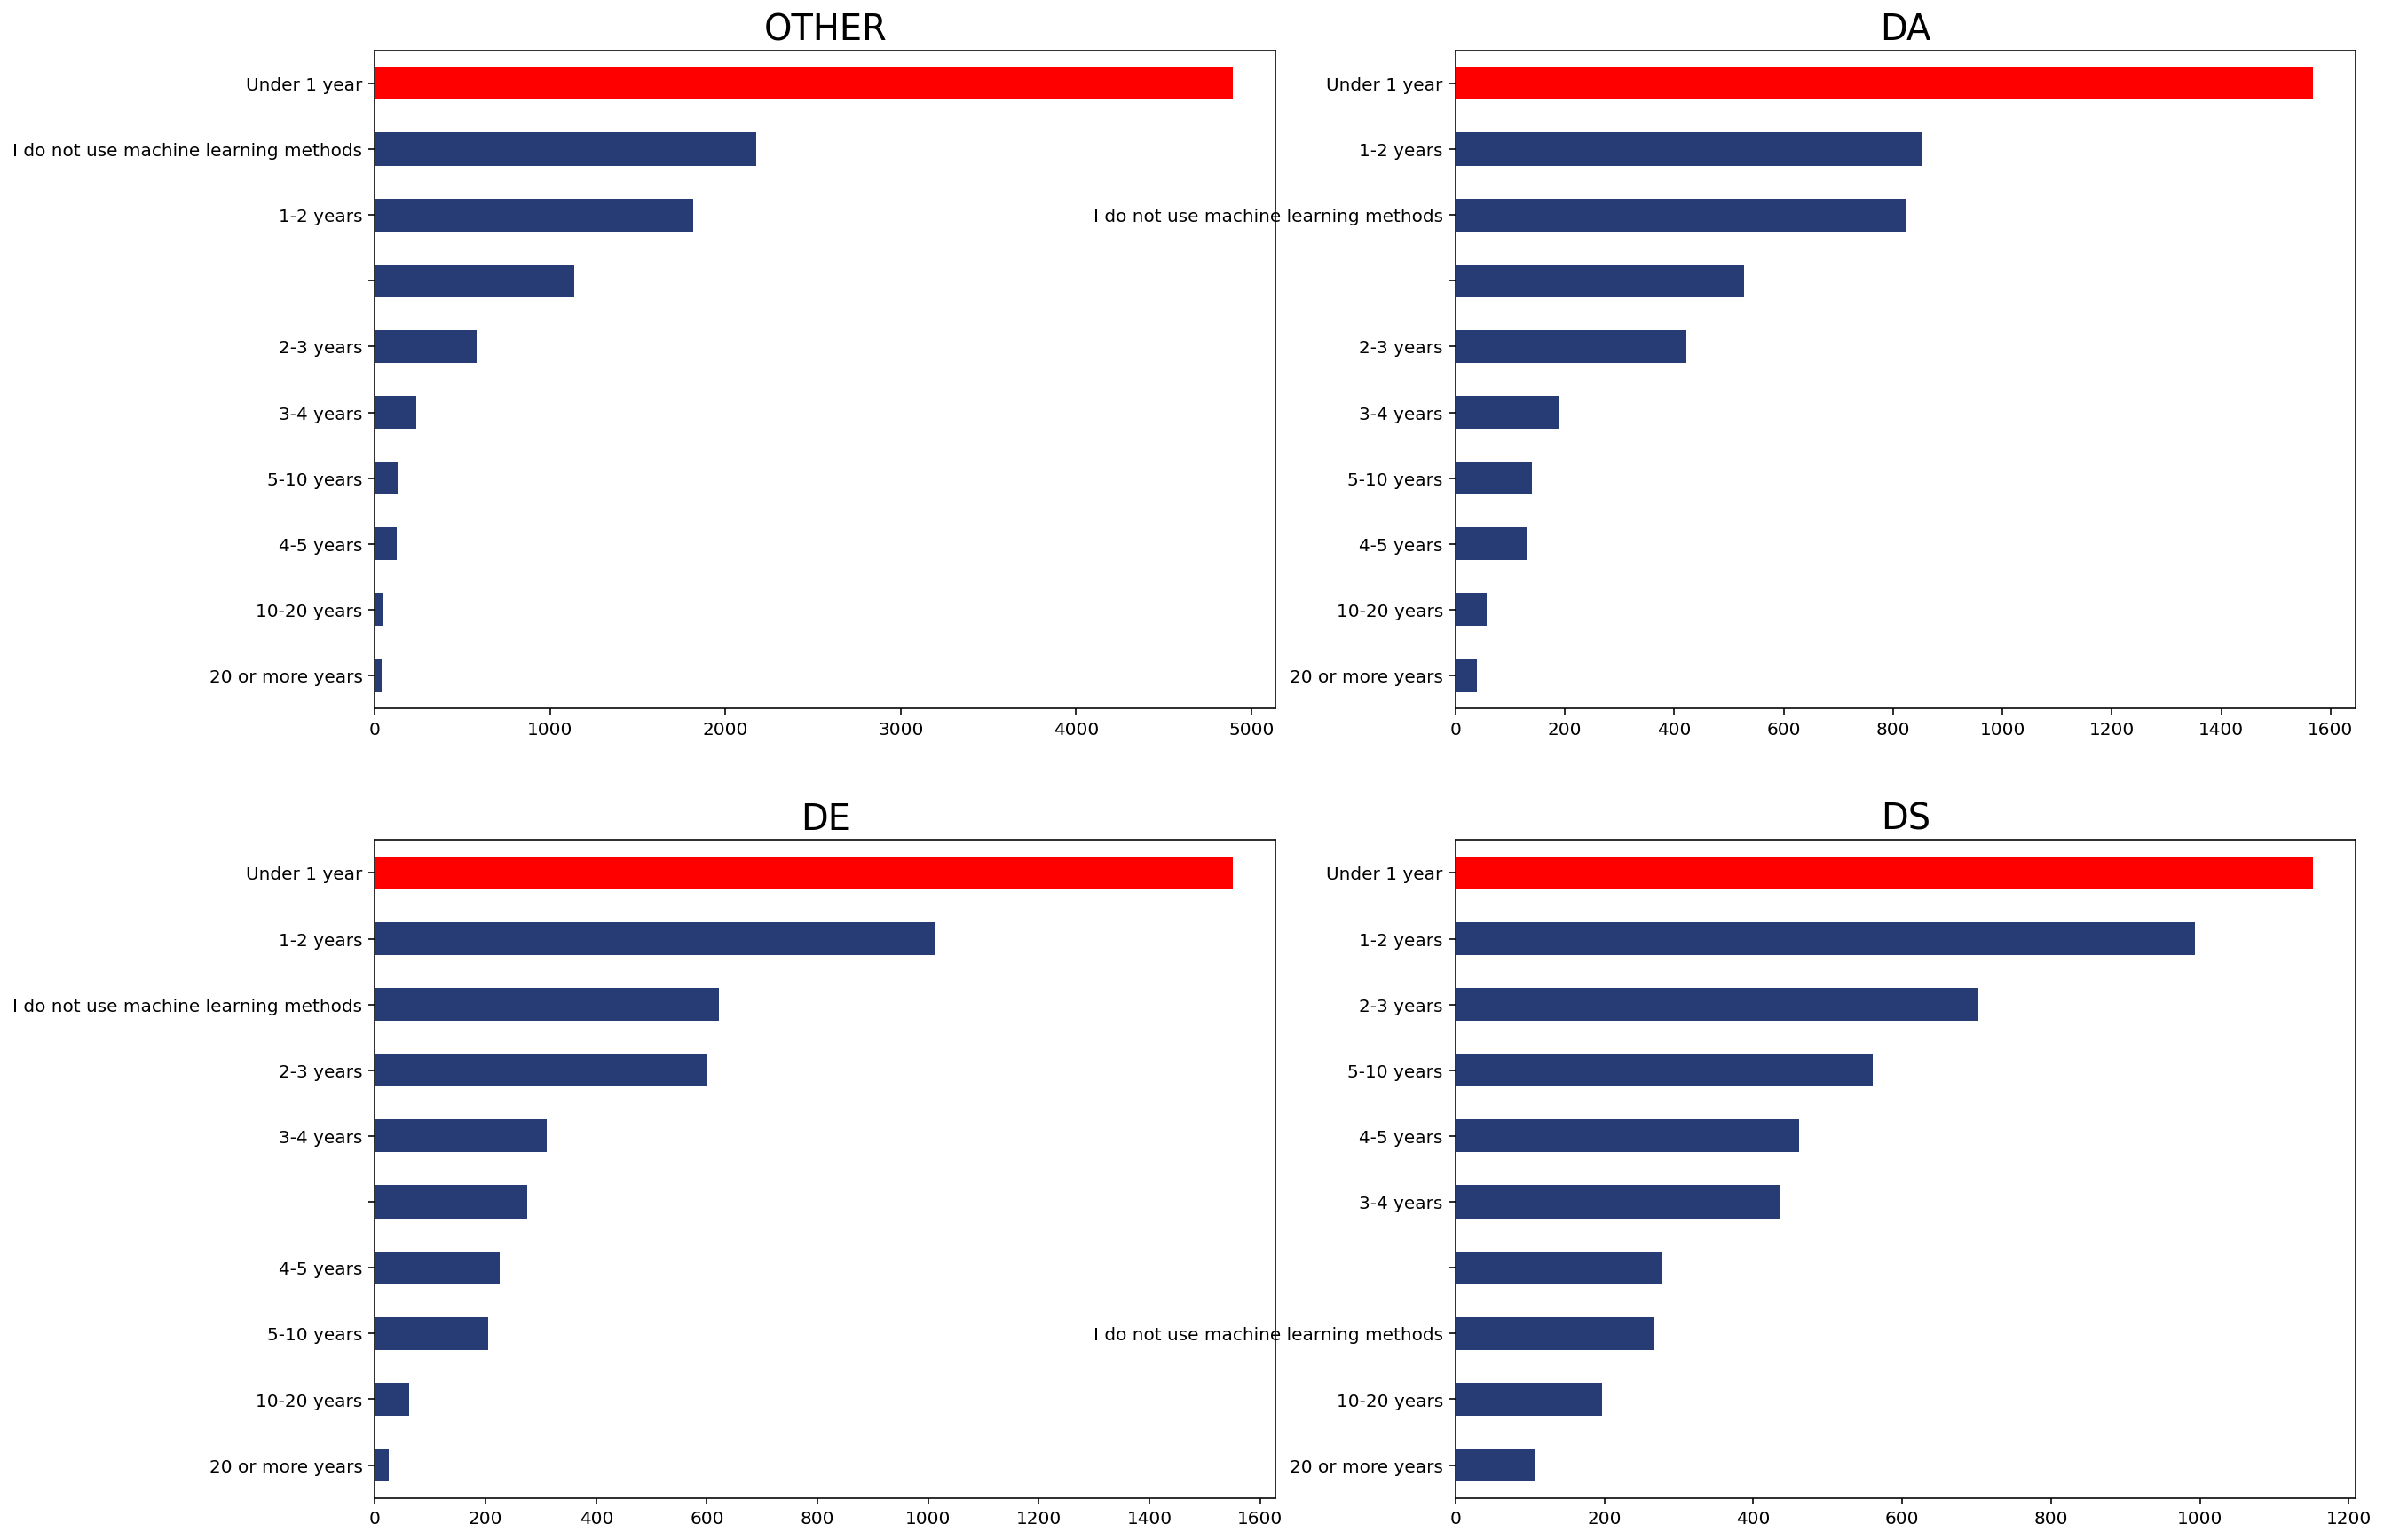

In [36]:
plt.subplots(figsize=(20,15))
job = response['Q5'].unique()
length = len(job)
col_color = {'Under 1 year':'r',
             'I do not use machine learning methods':'#273c75',
             '1-2 years':'#273c75',
             '2-3 years':'#273c75',
             '3-4 years':'#273c75',
             '4-5 years':'#273c75',
             '5-10 years':'#273c75',
             '10-20 years':'#273c75',
             '20 or more years':'#273c75',
             '':'#273c75'}

for i, j in itertools.zip_longest(job, range(length)):
  plt.subplot((length/2), 2, j+1)
  data = response[response['Q5'] == i]['Q15'].value_counts(ascending=True)
  data.plot(kind='barh', color=pd.DataFrame(data).reset_index()['index'].replace(col_color))
  plt.title(i, size=20)

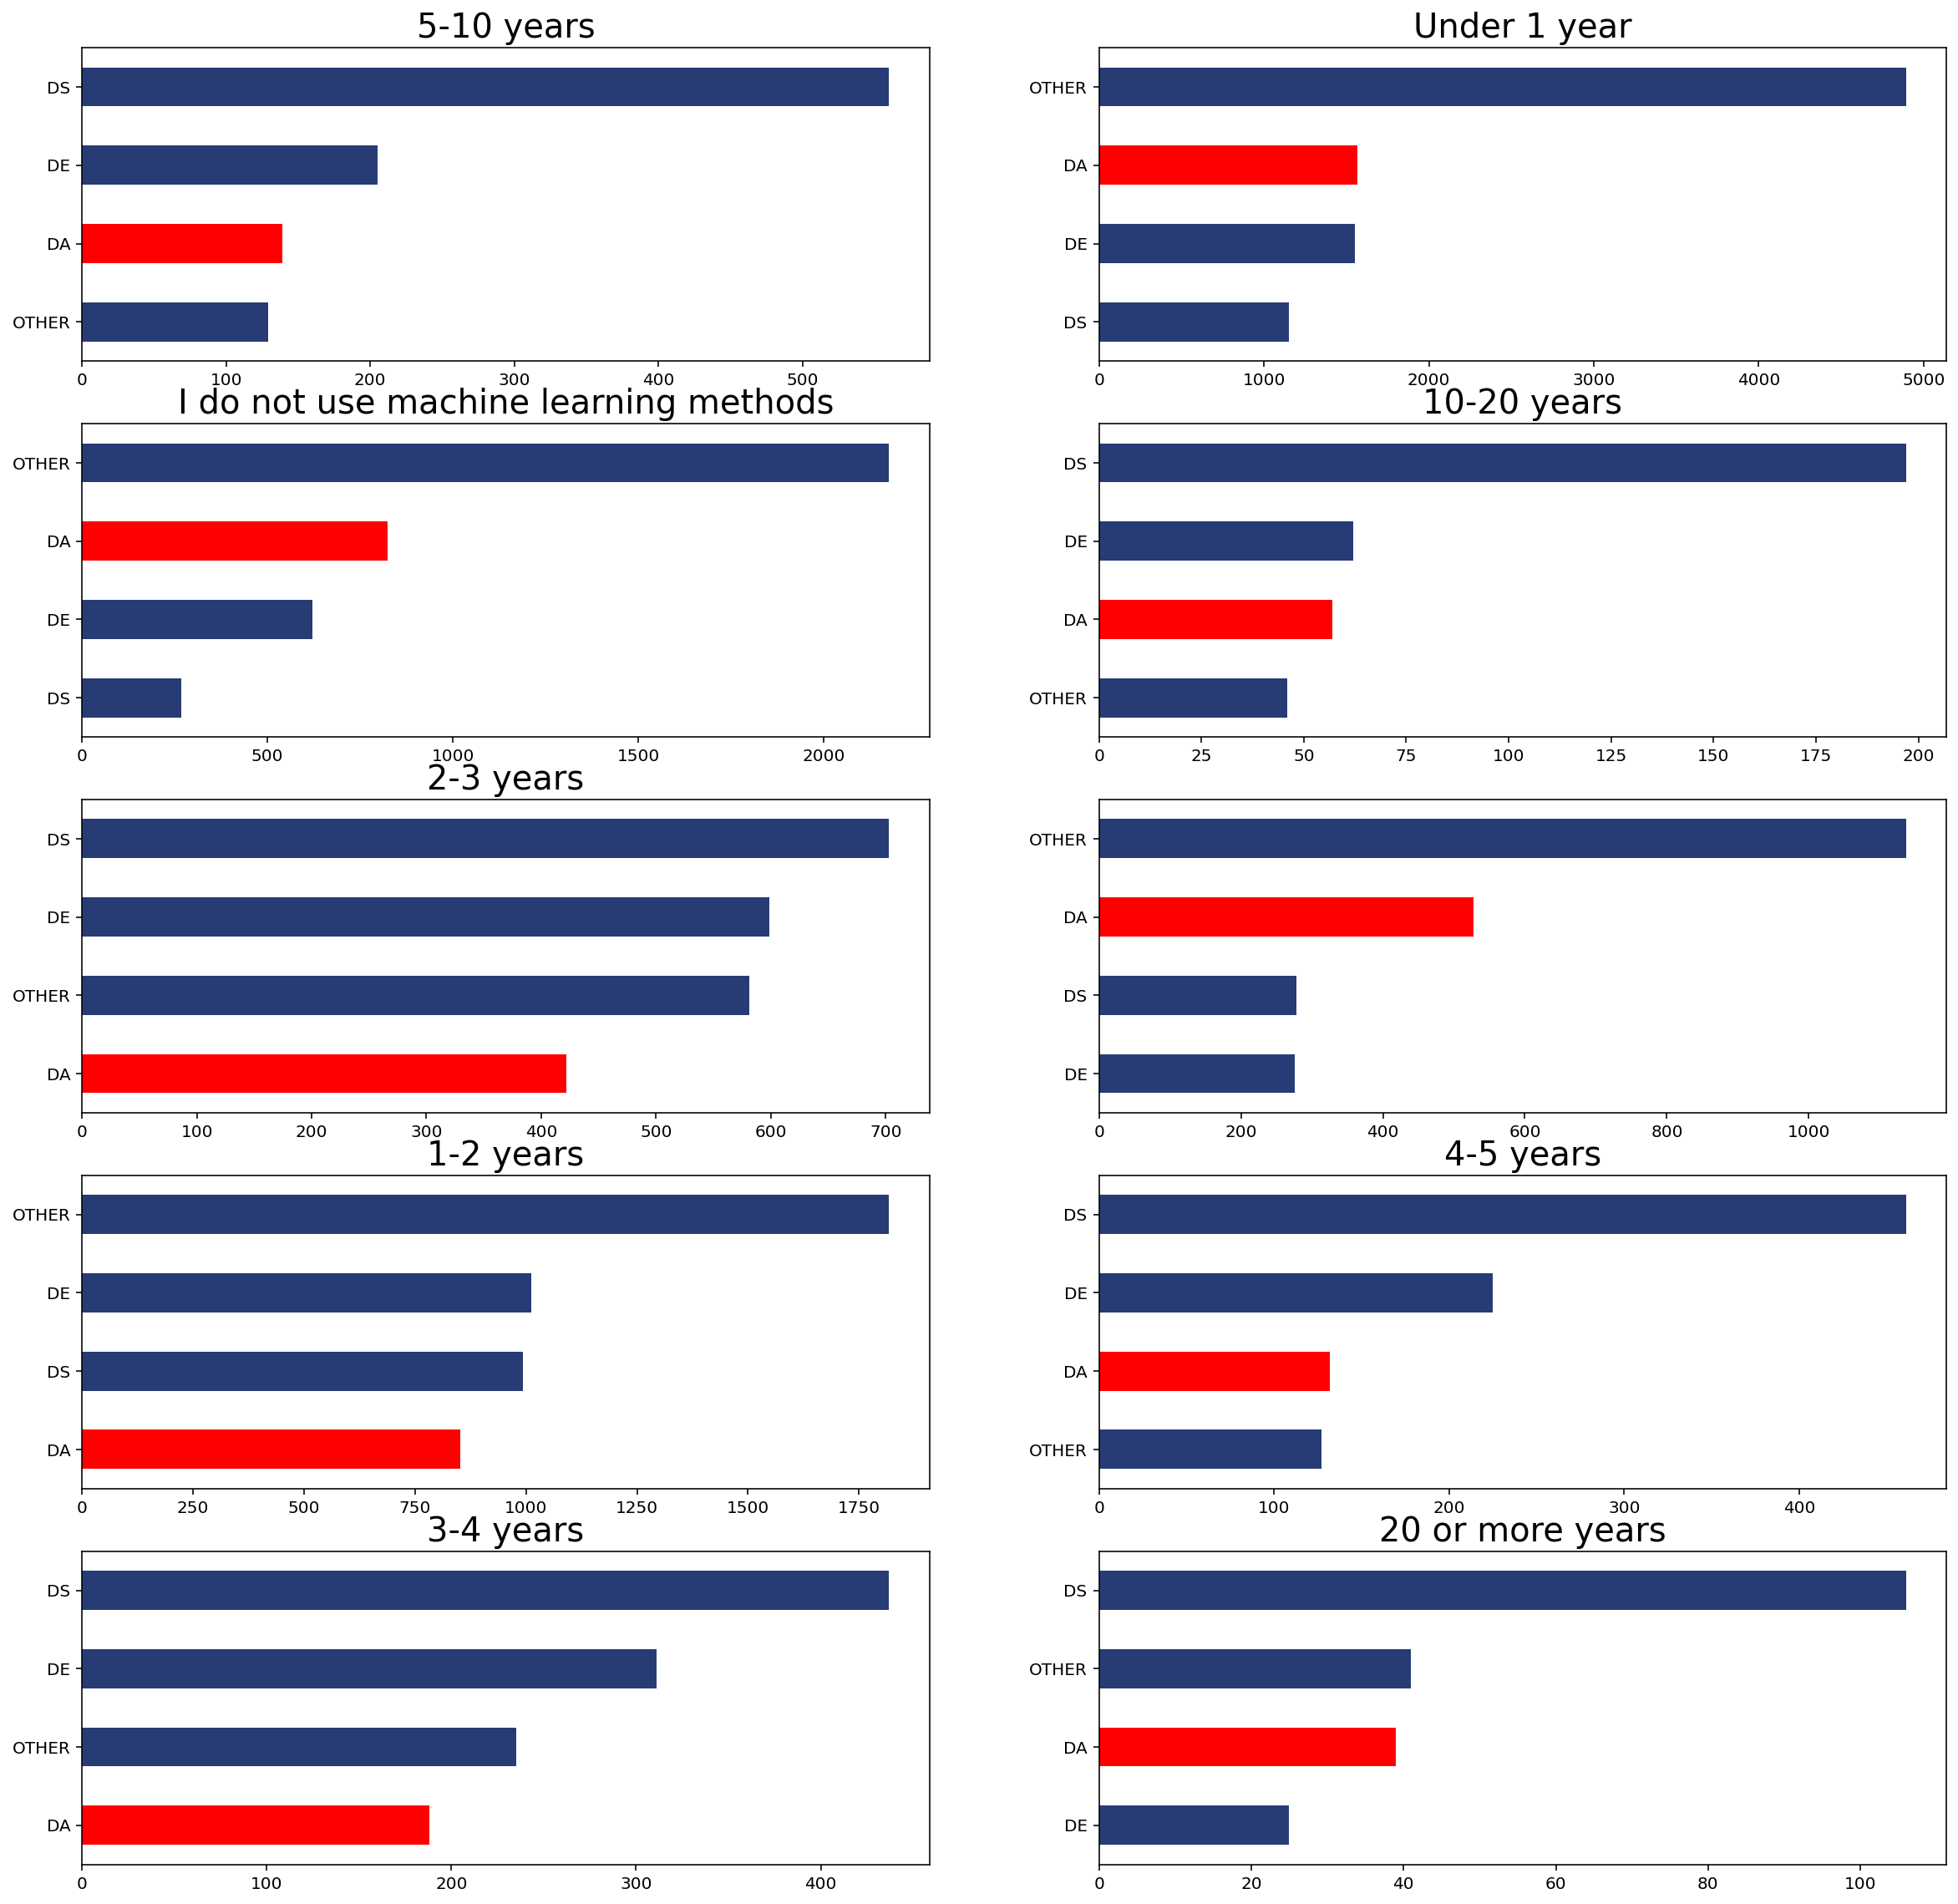

In [37]:
plt.subplots(figsize=(20,20))
exp = response['Q15'].unique()
length = len(exp)
col_color = {'DA':'r',
             'DE':'#273c75',
             'DS':'#273c75',
             'OTHER':'#273c75'}

for i, j in itertools.zip_longest(exp, range(length)):
  plt.subplot((length/2), 2, j+1)
  data = response[response['Q15'] == i]['Q5'].value_counts(ascending=True)
  data.plot(kind='barh', color=pd.DataFrame(data).reset_index()['index'].replace(col_color))
  plt.title(i, size=20)